## Author: Marktus A Atanga
## School: Johns Hopkins University
## Class: Introduction to Machine Learning
## Algorithm: Hierarchical agglomerative clustering from Scratch

## Analysis Approach:

1. Brieff overview of the algorithm
2. Data loading, cleaning and exploration
3. Data standardization
4. Split data into train and test
5. Model selection
6. Model building
7. Model assessement 

## Clustering Algorithms
The goal of clustering is to identify “natural” subgroups within a data set. So, it is more of a data discovery activity. Clustering algorithms use a similarity metric to identify “groupings” in the data. Most of the similarity metrics are the distance metrics such as Minkowski Metrics($L_k$ norms): Examples of the Minkowski metrics are Manhattan/city-block distance($L_1$ norm), Euclidean distance($L_2$ norm), and Max-coordinate distance ($L_\infty$ norm).

The the Minkowski distance metrics is given by:
$d_m(X^r, X^s) = [\sum_{j=1}^d |X_j^r - X_j^s|^p]^{\frac{1}{p}}$


#### City block distance or Manhattan distance ($L_1$ norm) : p = 1

$d_cb(X^r, X^s) = [\sum_{j=1}^d |X_j^r - X_j^s|^1]^{\frac{1}{1}} = \sqrt{\sum_{j=1}^d |X_j^r - X_j^s|}$

#### Euclidean distance ($L_2$ norm): p = 2

$d_m(X^r, X^s) = [\sum_{j=1}^d |X_j^r - X_j^s|^2]^{\frac{1}{2}} = \sqrt{\sum_{j=1}^d |X_j^r - X_j^s|^2}$

How different is clustering from classification? Well, the two are similar. The only difference is that classification uses predefined classes in which the input data are assigned/labeled classes for training whereas clustering identifies structural similarities in input data and groups them according to those characteristics which differentiate them from other. Therefore, classification is a supervised machine learning but clustering is unsupervised mahcine learning. More detatils to the difference can be found in https://www.geeksforgeeks.org/ml-classification-vs-clustering/ . 

### Families of clustering algorithms:
1. partitioning
2. hierarchical agglomerative
3. hierarchical divisive
4. spectral
5. adaptive resonance theory (ART)

### General approach to clustering 
1. Choose appropriate attributes
2. Scale the data
3. set each variable’s mean = 0 and standard deviation = 1
4. Screen for outliers
5. Conduct cluster analyses
    1. select approach(es) and algorithm(s), e.g K-Means
    2. perform clustering
    3. evaluate number of clusters
    4. repeat
6. Interpret the clusters
7. Validate the results


### 1. What is Hierarchical agglomerative clustering and the math behind it?
Unlike partitioning clustering in which we assume a mixture model to the data or find code words for minimizing reconstruction error, hierarchical clustering use only similarities of instances without any other requirement on the data. (Ethem Alpaydin, 2020). Thus, hierarchical clusterings seeks to minimize within class similairities and maximize between class similarities. The metrics we use here is the distance metrics such as the eucladian distance. 

There are two types of hierarchical clustering; $agglomerative-hierarchical$ clustering and $divisive-hierarchical$ clustering, one is the opposite of the other.

#### Agglomerative hierarchical clustering algorithm:
This is a bottom up clustering algorithm wehere it starts by treating each data point as a cluster (starts with N groups, each intially containing one training instance) and merging similar groups to form larger groups until there is a single one. At each iteration, choose the two closest groups to merge. The results of hierarchical agglomerative clustering is drawn as a dendrogram. There are two measures commonly used to choose the closet groups:

1. Single-link clustering: the closest groups are the smallest distance between all possible pairs of elements of the two groups:

$(G_i, G_j) = min_{X^r \in  G_i, X^s\in G_j}d(X^r, X^s)$.  This guarantees an optimal solution compare to other measures 
2. Complete-link clustering: The distance between two groups is the largest distance between all possible pairs: 

$(G_i, G_j) = max_{X^r \in  G_i, X^s\in G_j}d(X^r, X^s)$

Other measures for calculating the closet groups:
3. Average-link clustering (uses the average of all of the pairwise distances)
4. Centroid-link clustering (uses the distance between the cluster means)

### 2. Steps for the algorithm - Taken from Ethem Alpaydin, 2020

1. Scale the data (𝜇=0, 𝜎=1) and remove outliers (if any)
2. Define each single data point as its own cluster
3. Calculate the Euclidian distances between every cluster and every other cluster
4. Combine the two clusters that have the smallest distance, reducing the number of clusters by one
    The smallest distance is chosen using the single-link or complete-link clsutering 
5. Repeat steps 2 & 3 until all clusters have been merged into a single cluster which contains all of the data points

### Example aaplication of hierarchical clustering
1. A measure of DNA sequence similarity by Fourier Transform with applications on hierarchical clustering (Changchuan Yin, Ying Chen, Stephen S.-T.Yau, 2014)
2. Applications of Hierarchical Cluster Analysis (CLA) and Principal Component Analysis (PCA) in Feed Structure and Feed Molecular Chemistry Research, Using Synchrotron-Based Fourier Transform Infrared (FTIR) Microspectroscopy (Peiqiang Yu, 2005)

### 2.0. Model selection
In model building, we sometimes have so many attributes/features to choose from.  When one decides on a model technique to use such as a naive Bayes, K-means, linear regresion, etc., the important question to ask oneself is whether all the attributes in the data are needed to build the model. The idea of model selection is to choose the optimal number of attributes/features that best fit a model for prediction or classification. 

Thus, model selection is essentially an optimization problem where we want to find the best features/attributes that give the optimal model performance. Another advantage is that it helps prevent over-fitting the model with so much features. There are various techniques for selecting a model. Some of the techniques inclue stepwise regression, stepwise forward selection, stepwise backward elemination, and best subset selection. 

Each of these model selection criteria has a metric for determining the optimal attributes for the model. In the case of regression analysis, the most widely used metrics are Mellow's Cp, R-squaure, ddjusted R-square, mean square error (MSE), Bayesian information criterion (BIC) aslso called Schwarz information criterion, Akaike information criterion (AIC). For all these metrics, we aim to find a model with the minimum criterior except the  R-squaure, ddjusted R-square,where we want to maximise.

In the case of classification models, we can use metrics such as accuracy, error-rate, MSE, sensitivity, precision, or F_measure to determined the best model. The model with the lowest error-rate or MSE can be used. Or the model with the highest sensitivity, precission, specificity, accuracy, or F_measure can also be used. Ideally, the metric you use should be based on the design intent of the model.

### 2.1. Stepwise-Forward-Selection(SFS): 
Let's discuss the stepwise forward selection (SFS) and how we can use it to select the best naive Byaes model for classfication. The SFS approach is to successively fit models of increasing attributes until the until we find an optimal model. As pointed out earlier, we need to define a model selection criterion (model performance metric) that can be used to identify what the best is. Since the F_measure takes into account both sensitivity and precision, I will use F-measure as a metric to determine the best model.

The steps involved in stepwise-forward selection are:
1. Define model success threshold, as a difference in model performance that is considered insignificant. This will be used as a stopping criterion in the model selection process.
2. First iterates through all the features to find the feature that gives best model score metric.
3. Perform pair-wise features iteration by combining the best feature with all other features, one at a time to find the best two features. Compare the model score against the score obtained in step 2. If the score metric difference is greater than the threshold, contiune to search for best 3 features
4. Reiterate to find the best 3 features, by combining the best 2 features in 3, withe remaining feaures. Check score metric against the sore in 3. If score difference is still greater than threshold, continue search for more features. In each iteration, compare model score metric against previous score metric. If the difference in core is not greater than the threshold, return all best features found.

### 3.0. Model performance assessement 

Unlike classfication, we do not know the label before hand in clustering problems. Therfore, the assessement of model perfromance base on true positive, false positive, true negative, or false negative is not possible. Rather, the clustering algorithm is assessed using Silhouette coefficient.

### 3.1. Silhouette coefficient
This refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been clustered. The silhouette value is a measure of how similar an object is to its own cluster compared to other clusters. The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters. The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance. https://en.wikipedia.org/wiki/Silhouette_(clustering)

There are three steps invlove:

1. Create a distance metric such as the euclidean distance
2. For each data point, calculate the distance between the data point and every orther point in the cluster. This is call cohesion or intra-cluster distance (a)
3. For each point in a cluster, calculate the distance between the point and points in the nearest cluster (b) . This is intercluster distance or separation. If we have more than two clusters, the intercluster distance is chosen from the closest cluster.     
    
4. The Silhouette coefficient for each data point is given by:
    
    $S_i = \frac{(b-a)}{max(a, b)}$
    
    if a<b: $S_i = 1-\frac{a}{b}$
    
    if a>b: $S_i = \frac{b}{a} - 1$
    
    if a=b: $S_i = 0$
    
#### Interpretation of Silhouette coefficient:
1. Silhouette coefficient = -1 means that clustering of the data is wrong
2. Silhouette coefficient = 0 means that the data is indifferent/the clusters are the same
3. Silhouette coefficient = 1 means that both clusters are far apart - we we want.

In [1]:
%matplotlib inline

In [2]:
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.6f}'.format

## 2. Load the synthetic data set
There might be some white spaces in the excel sheets so we add sep="\s*,\s*" and engine='python' to remove white space in the data.

In [3]:
file1= r"proj2.csv"

#create headers for the data
headers = ["x1", "x2", "x3", "x4", "x5", "class"]

#read data with pandas read csv function
df_syn = pd.read_csv(file1, sep="\s*,\s*", names = headers, engine='python')

#shuffle the data
df_syn.sample(frac = 1).head(10)

,x1,x2,x3,x4,x5,class
6272,4.337155,0.438903,9.015104,-1.237847,7.011350,H
547,2.654580,3.614900,3.631416,8.565752,1.741531,G
6364,4.049484,2.109540,8.795584,-0.920417,6.980317,H
5202,3.425452,1.033105,6.541270,-2.693197,7.876942,H
6815,2.451159,-1.899094,7.485636,-3.670784,6.948940,H
5820,3.125890,-0.383196,7.547992,-2.753862,5.347669,H
6956,3.377950,0.281000,7.922005,-2.377199,7.019239,H
4993,1.570327,3.575264,1.075172,6.500899,0.921107,G
7255,3.121096,0.501043,4.926423,-3.587073,6.710481,H
262,0.431435,3.949538,3.653352,7.321550,-0.245035,G


### check for any NAN in the data

In [4]:
df_syn.isnull().values.any()

False

There is no missing value in the data

#### Data type

In [5]:
df_syn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10000 non-null  float64
 1   x2      10000 non-null  float64
 2   x3      10000 non-null  float64
 3   x4      10000 non-null  float64
 4   x5      10000 non-null  float64
 5   class   10000 non-null  object 
dtypes: float64(5), object(1)
memory usage: 468.9+ KB


In [6]:
df_syn.describe()

,x1,x2,x3,x4,x5
count,"10,000.000000","10,000.000000","10,000.000000","10,000.000000","10,000.000000"
mean,2.494518,2.496199,4.843011,2.492765,2.750871
std,1.812087,2.080690,3.007629,4.612000,2.847097
min,-2.721731,-4.039889,-3.027936,-5.585811,-6.190830
25%,0.960851,0.935419,2.181781,-2.007369,0.445947
50%,2.495290,2.493898,4.841607,2.967166,2.740706
75%,4.005690,4.057398,7.484478,6.975070,5.063144
max,7.826375,9.480107,13.117517,10.832774,10.812203


### Use boxplot to detremine the presence of outliers in the data and remove them

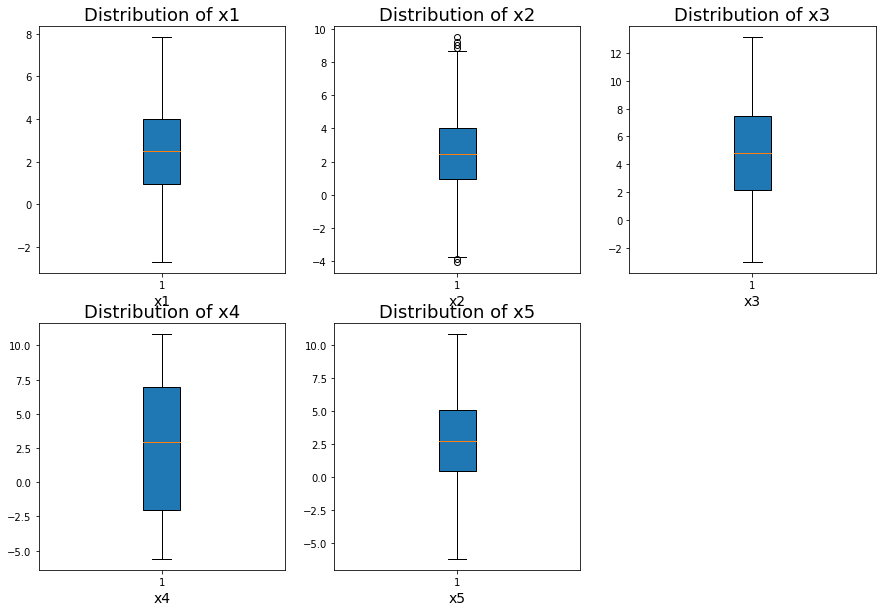

In [7]:
figure = plt.figure(figsize=(15, 10))
axes = figure.add_subplot(2, 3, 1)

patch = axes.boxplot(df_syn["x1"], showfliers=True, patch_artist=True, zorder=1)
axes.set_title("Distribution of x1", fontsize = 18)
axes.set_xlabel("x1", fontsize = 14)

axes = figure.add_subplot(2, 3, 2)
patch = axes.boxplot(df_syn["x2"], showfliers=True, patch_artist=True, zorder=1)
axes.set_title("Distribution of x2", fontsize = 18)
axes.set_xlabel("x2", fontsize = 14)

axes = figure.add_subplot(2, 3, 3)
patch = axes.boxplot(df_syn["x3"], showfliers=True, patch_artist=True, zorder=1)
axes.set_title("Distribution of x3", fontsize = 18)
axes.set_xlabel("x3", fontsize = 14)

axes = figure.add_subplot(2, 3, 4)
patch = axes.boxplot(df_syn["x4"], showfliers=True, patch_artist=True, zorder=1)
axes.set_title("Distribution of x4", fontsize = 18)
axes.set_xlabel("x4", fontsize = 14)

axes = figure.add_subplot(2, 3, 5)
patch = axes.boxplot(df_syn["x5"], showfliers=True, patch_artist=True, zorder=1)
axes.set_title("Distribution of x5", fontsize = 18)
axes.set_xlabel("x5", fontsize = 14)

plt.show()
plt.close()

x2 has outliers that we need to remove from the data. Remember that boxplot showfliers use 1.5*mean as threshold to define outliers. Therefore, we can use that to remove the outliers from the data.

In [8]:
def outlier_removal(data):
    """
    The function calculates the 0.01 percentile and 0.99 percentile
    It sets extreme vaues to the two percentiles base on whether the extreme values are
    high or low.
    """
    df = data.copy()
    for col in df.columns:
        if col=="class":
            df[col]=df[col]
        elif (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.1,0.9]).values
            
            df[col].loc[df[col] <= percentiles[0]] = percentiles[0]
            df[col].loc[df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

df_syn_filtered = outlier_removal(df_syn)

c:\python38\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


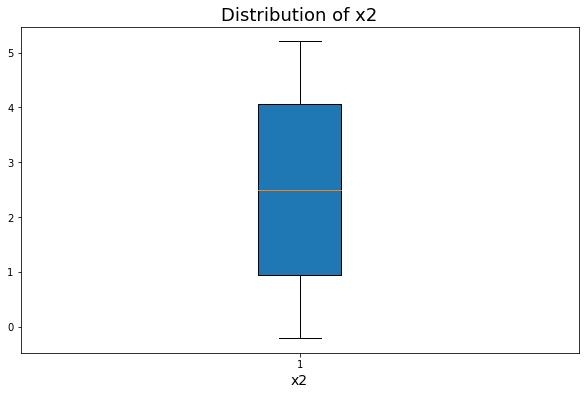

In [9]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)

axes.boxplot(df_syn_filtered["x2"], showfliers=True, patch_artist=True, zorder=1)

axes.set_title("Distribution of x2", fontsize = 18)
axes.set_xlabel("x2", fontsize = 14)

plt.show()

### Convert the string values for class into boolean

In [10]:
def string_to_boolean(x):
    """
    This fucntion takes a column of the data, calculates the mean
    and set any number less than the mean to zero, else 1
    """
    coded = []
    for value in x:
        if value == "G":
            coded.append(1)
        if value == "H":
            coded.append(0)
    return coded

df_syn_filtered = df_syn_filtered.apply(lambda x: string_to_boolean(x) if x.name in ['class'] else x)
df_syn_filtered.sample(frac = 1).head(10)

,x1,x2,x3,x4,x5,class
5302,4.513079,1.058183,7.367144,-1.679197,3.349035,0
1401,0.489550,2.287875,3.068701,6.725563,-0.203032,1
2651,0.157585,0.997017,0.978655,4.497901,1.808836,1
5746,3.635377,-0.207068,8.184193,-2.193275,4.602901,0
8778,4.830862,-0.133065,8.675772,-0.735354,5.625179,0
1139,1.697080,4.179963,2.378093,7.551042,-0.763009,1
4962,1.445193,5.203998,3.449028,7.828824,-0.339709,1
6592,1.541973,-0.025295,7.616983,-2.873622,6.490963,0
1103,1.476180,3.664341,0.978655,6.525537,-0.957793,1
1627,0.157585,3.433610,0.978655,5.562533,-0.957793,1


In [11]:
df_syn_filtered["class"].unique()

array([1, 0], dtype=int64)

### Histogram distribution of the data 

In [12]:
df1_class0 = df_syn_filtered[df_syn_filtered["class"] ==0].reset_index(drop=True)
df1_class1 = df_syn_filtered[df_syn_filtered["class"] ==1].reset_index(drop=True)

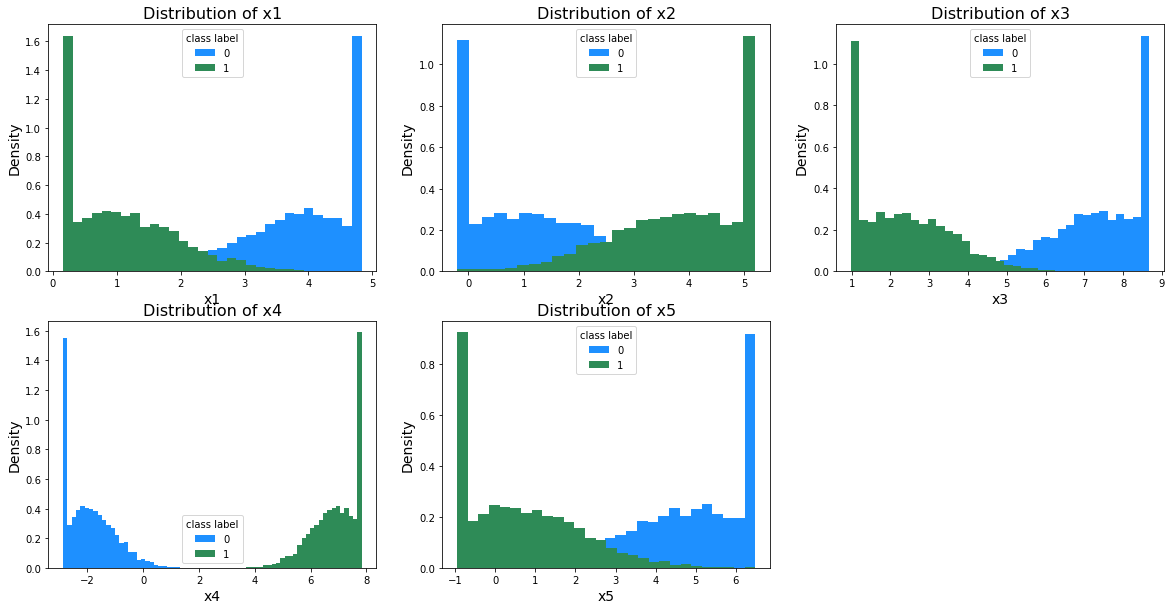

In [13]:
figure = plt.figure(figsize=(20,10))
i = 1
for column in df1_class0.columns:
    if column == "class":
        continue
    else: 
        ax = plt.subplot(2,3,i)
        ax.hist(df1_class0[column], bins="auto", density=True, color="DodgerBlue", label = "0")
        ax.hist(df1_class1[column], bins="auto", density=True, color="seagreen", label = "1")
        plt.title("Distribution of " + str(column), fontsize = 16)
        plt.ylabel( "Density", fontsize = 14)
        plt.xlabel( str(column), fontsize = 14)
        plt.legend(title = "class label")
    
    i = i+1
plt.show()

The distributions of the variables in the data set are normal. Feature x4 is a good feature for classifying these variables. It will be interesting to see what features are chosen by the stepwise forward selection method.

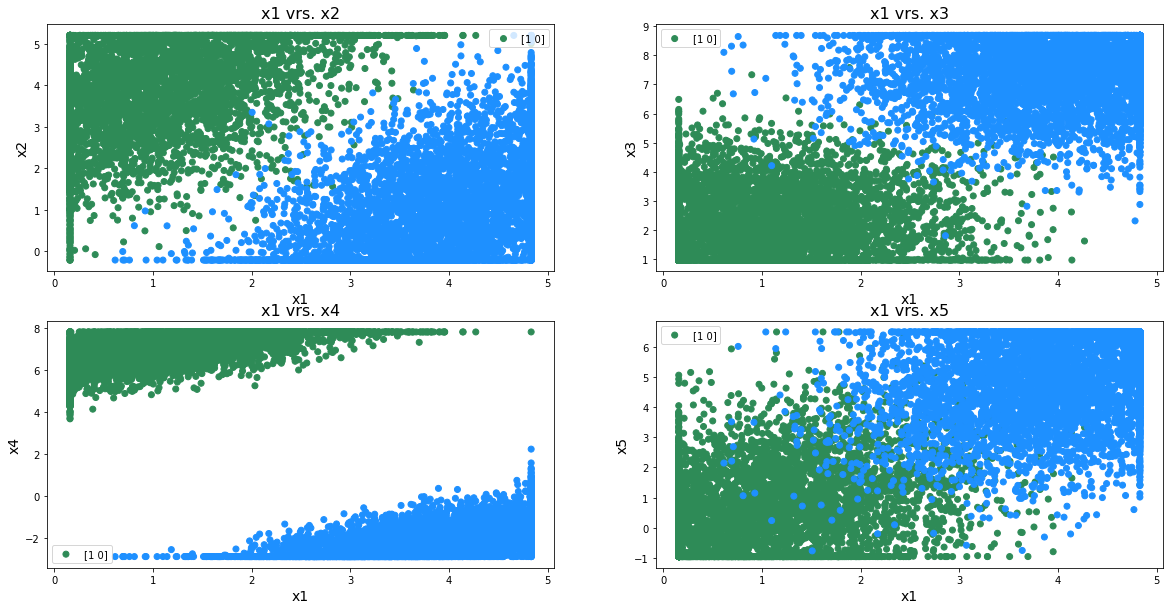

In [14]:
figure = plt.figure(figsize=(20,10))
i = 1
for col in df_syn_filtered.columns:
    if ((col == "class") or (col == "x1")):
        continue
    axes = figure.add_subplot(2, 2, i)
    labels = [0, 1]
    colors = df_syn_filtered["class"].apply(lambda x: "DodgerBlue" if x ==0  else 'seagreen')
    axes.scatter(df_syn_filtered.x1, df_syn_filtered[col],  color = colors, label = df_syn_filtered["class"].unique())
    axes.set_title("x1 vrs. " + str(col),  fontsize  = 16)
    axes.set_xlabel( "x1",  fontsize  = 14)
    axes.set_ylabel(str(col),  fontsize  = 14)
    i = i+1
    axes.legend()

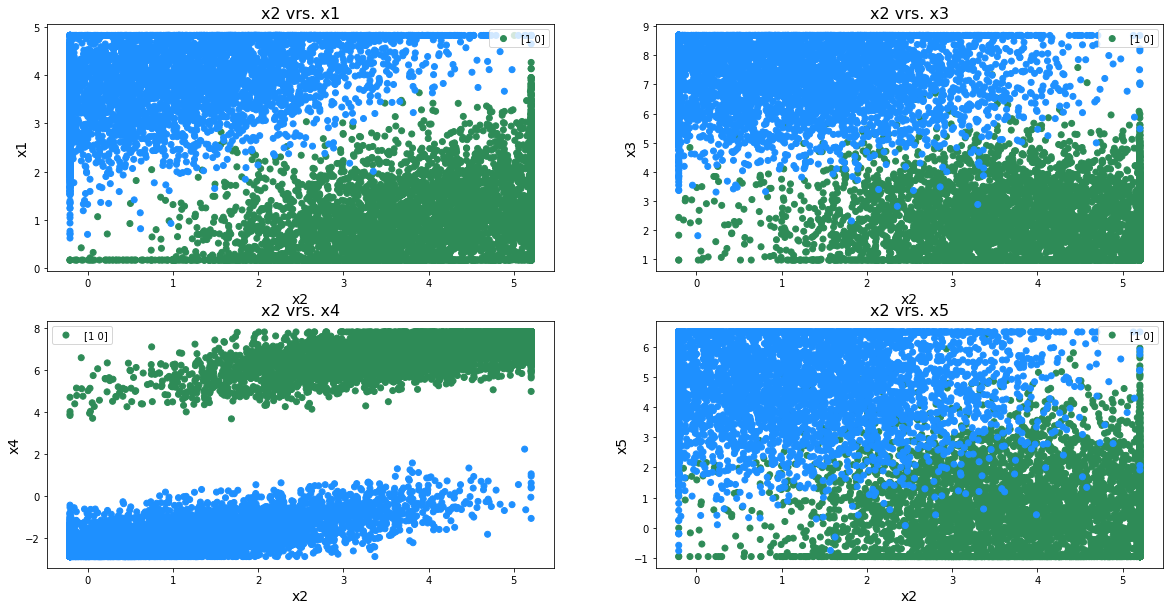

In [15]:
figure = plt.figure(figsize=(20,10))
i = 1
for col in df_syn_filtered.columns:
    if ((col == "class") or (col == "x2")):
        continue
    axes = figure.add_subplot(2, 2, i)
    labels = [0, 1]
    colors = df_syn_filtered["class"].apply(lambda x: "DodgerBlue" if x ==0  else 'seagreen')
    axes.scatter(df_syn_filtered.x2, df_syn_filtered[col],  color = colors, label = df_syn_filtered["class"].unique())
    axes.set_title("x2 vrs. " + str(col),  fontsize  = 16)
    axes.set_xlabel( "x2",  fontsize  = 14)
    axes.set_ylabel(str(col),  fontsize  = 14)
    i = i+1
    axes.legend()

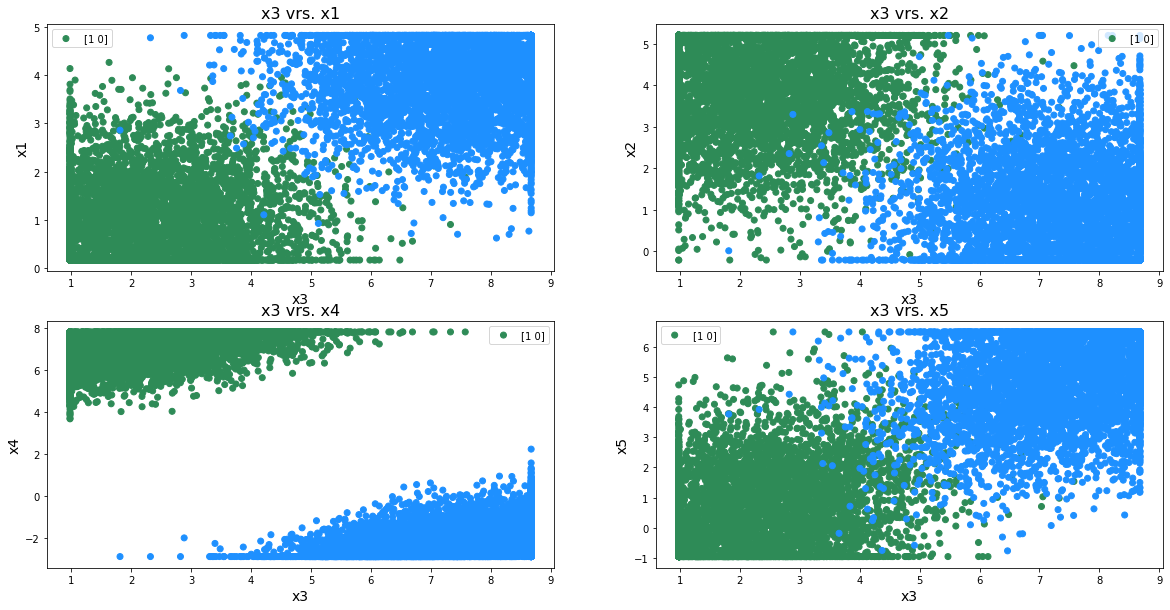

In [16]:
figure = plt.figure(figsize=(20,10))
i = 1
for col in df_syn_filtered.columns:
    if ((col == "class") or (col == "x3")):
        continue
    axes = figure.add_subplot(2, 2, i)
    labels = [0, 1]
    colors = df_syn_filtered["class"].apply(lambda x: "DodgerBlue" if x ==0  else 'seagreen')
    axes.scatter(df_syn_filtered.x3, df_syn_filtered[col],  color = colors, label = df_syn_filtered["class"].unique())
    axes.set_title("x3 vrs. " + str(col),  fontsize  = 16)
    axes.set_xlabel( "x3",  fontsize  = 14)
    axes.set_ylabel(str(col),  fontsize  = 14)
    i = i+1
    axes.legend()

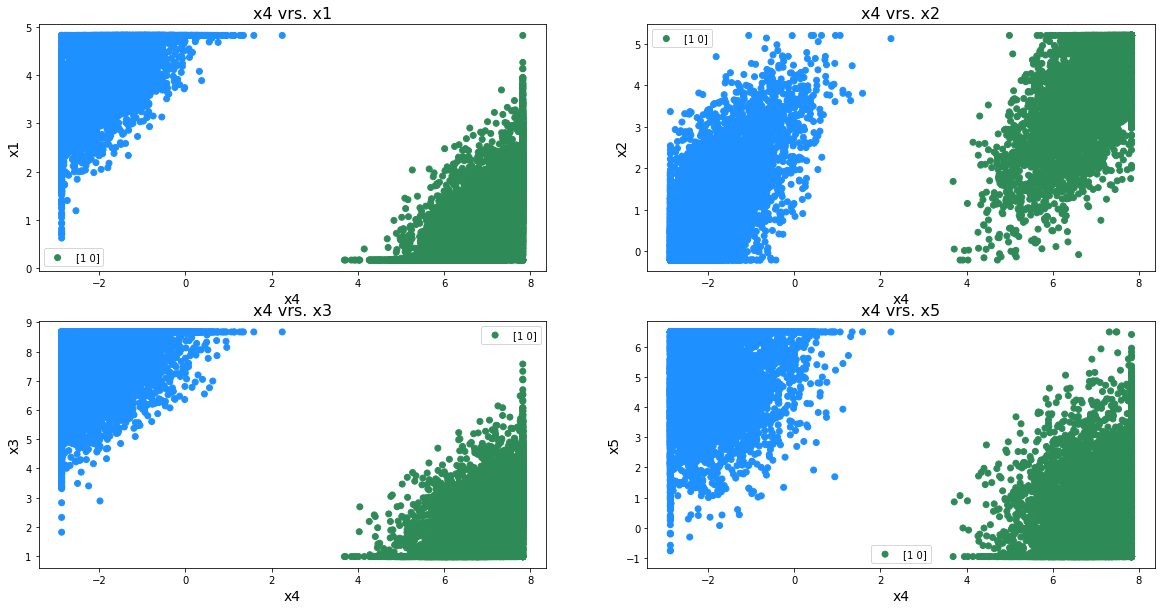

In [17]:
figure = plt.figure(figsize=(20,10))
i = 1
for col in df_syn_filtered.columns:
    if ((col == "class") or (col == "x4")):
        continue
    axes = figure.add_subplot(2, 2, i)
    labels = [0, 1]
    colors = df_syn_filtered["class"].apply(lambda x: "DodgerBlue" if x ==0  else 'seagreen')
    axes.scatter(df_syn_filtered.x4, df_syn_filtered[col],  color = colors, label = df_syn_filtered["class"].unique())
    axes.set_title("x4 vrs. " + str(col),  fontsize  = 16)
    axes.set_xlabel( "x4",  fontsize  = 14)
    axes.set_ylabel(str(col),  fontsize  = 14)
    i = i+1
    axes.legend()

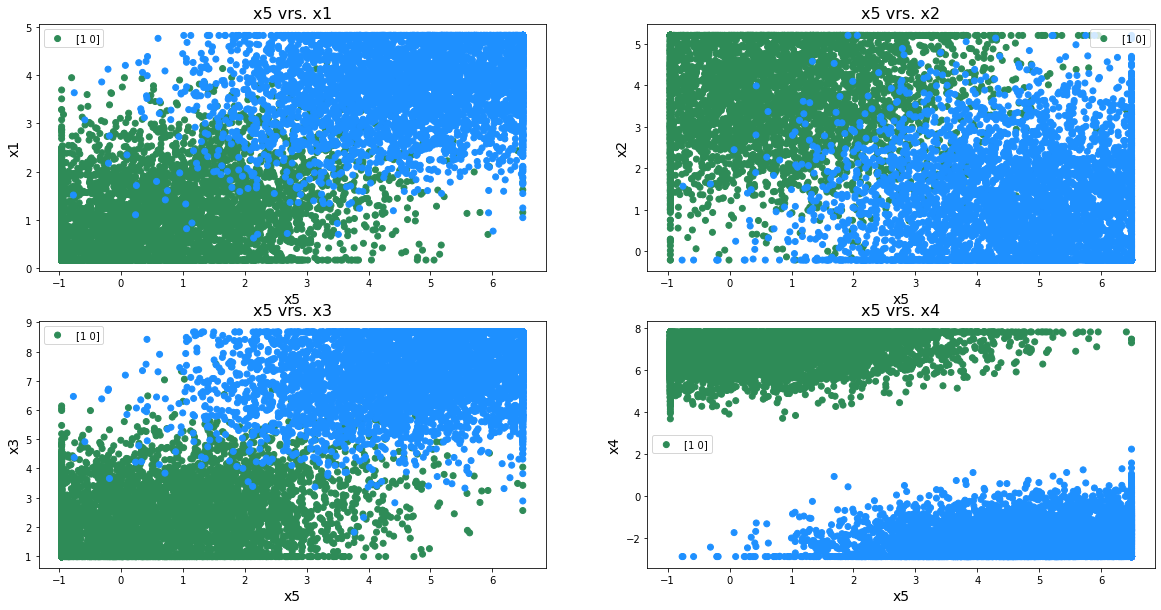

In [18]:
figure = plt.figure(figsize=(20,10))
i = 1
for col in df_syn_filtered.columns:
    if ((col == "class") or (col == "x5")):
        continue
    axes = figure.add_subplot(2, 2, i)
    labels = [0, 1]
    colors = df_syn_filtered["class"].apply(lambda x: "DodgerBlue" if x ==0  else 'seagreen')
    axes.scatter(df_syn_filtered.x5, df_syn_filtered[col],  color = colors, label = df_syn_filtered["class"].unique())
    axes.set_title("x5 vrs. " + str(col),  fontsize  = 16)
    axes.set_xlabel( "x5",  fontsize  = 14)
    axes.set_ylabel(str(col),  fontsize  = 14)
    i = i+1
    axes.legend()

### SPAM E-mail Data

In [19]:
file2 = r"spambase_data.csv"

#create headers for the data
headers = ["x1", "x2", "x3", "x4", "x5","x6", "x7", "x8", "x9", "x10", "x11", "x12", "x13", "x14", "x15", "x16",
           "x17", "x18", "x19", "x20", "x21", "x22", "x23", "x24", "x25", "x26", "x27", "x28", "x29", "x30", "x31",
           "x32", "x33", "x34", "35", "36", "37", "38", "x39", "x40", "x41", "x42", "x43", "x44", "x45", "x46", "x47",
           "x48", "x49", "x50", "x51", "x52", "x53", "x54", "x55", "x56", "x57", "class"]

#read data with pandas read csv function
df_spam = pd.read_csv(file2, sep="\s*,\s*", names = headers, engine='python')

#shuffle the data
df_spam.sample(frac = 1).head(10)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x49,x50,x51,x52,x53,x54,x55,x56,x57,class
3250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.763000,0.000000,0.000000,0.000000,0.000000,2.285000,10,16,0
1414,0.000000,0.190000,0.390000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,...,0.000000,0.030000,0.000000,0.152000,0.000000,0.000000,1.357000,19,148,1
2492,0.000000,0.000000,0.000000,0.000000,4.540000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5,16,0
2007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.510000,...,0.158000,0.553000,0.000000,0.000000,0.000000,0.000000,4.000000,37,216,0
1128,0.000000,0.000000,0.480000,0.000000,0.720000,0.480000,0.000000,0.000000,0.240000,0.000000,...,0.000000,0.036000,0.000000,0.036000,0.184000,0.000000,2.336000,66,264,1
162,0.140000,0.140000,0.290000,0.000000,0.290000,0.290000,0.000000,0.290000,0.000000,0.000000,...,0.000000,0.024000,0.000000,0.265000,0.000000,0.000000,3.121000,38,437,1
3886,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.625000,6,26,0
1586,0.000000,0.380000,0.380000,0.000000,0.000000,0.000000,0.000000,0.380000,0.380000,0.000000,...,0.000000,0.350000,0.000000,0.000000,0.350000,0.000000,2.162000,8,80,1
2013,0.000000,0.680000,0.340000,0.000000,0.000000,0.000000,0.000000,0.340000,0.000000,0.000000,...,0.000000,0.046000,0.000000,0.000000,0.000000,0.000000,3.344000,107,194,0
624,0.000000,0.000000,0.000000,0.000000,0.820000,0.000000,0.000000,1.650000,0.000000,0.820000,...,0.000000,0.113000,0.000000,0.113000,0.000000,0.000000,1.250000,4,50,1


#### Check for missing data

In [20]:
df_spam.isnull().values.any()

False

No missing data

#### Data type

In [21]:
df_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      4601 non-null   float64
 1   x2      4601 non-null   float64
 2   x3      4601 non-null   float64
 3   x4      4601 non-null   float64
 4   x5      4601 non-null   float64
 5   x6      4601 non-null   float64
 6   x7      4601 non-null   float64
 7   x8      4601 non-null   float64
 8   x9      4601 non-null   float64
 9   x10     4601 non-null   float64
 10  x11     4601 non-null   float64
 11  x12     4601 non-null   float64
 12  x13     4601 non-null   float64
 13  x14     4601 non-null   float64
 14  x15     4601 non-null   float64
 15  x16     4601 non-null   float64
 16  x17     4601 non-null   float64
 17  x18     4601 non-null   float64
 18  x19     4601 non-null   float64
 19  x20     4601 non-null   float64
 20  x21     4601 non-null   float64
 21  x22     4601 non-null   float64
 22  

#### Check for outliers using boxplot.

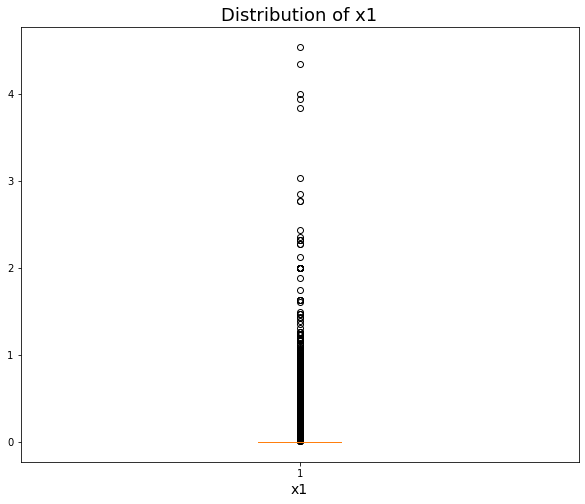

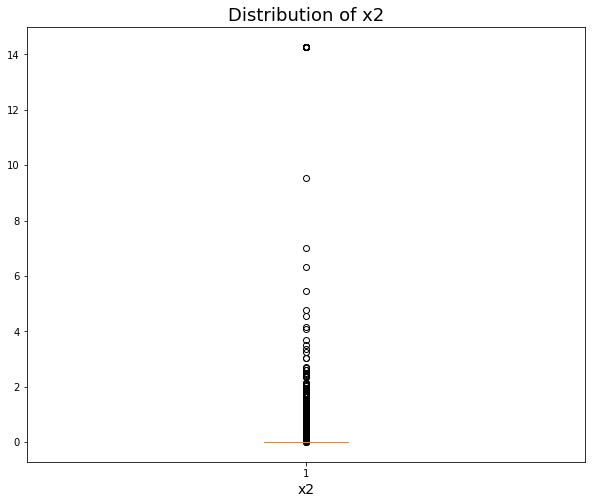

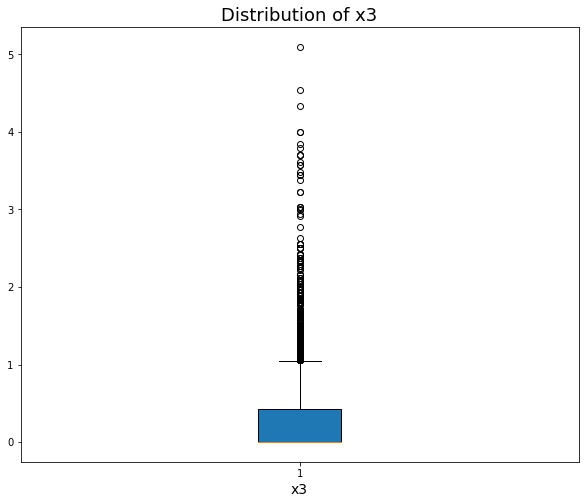

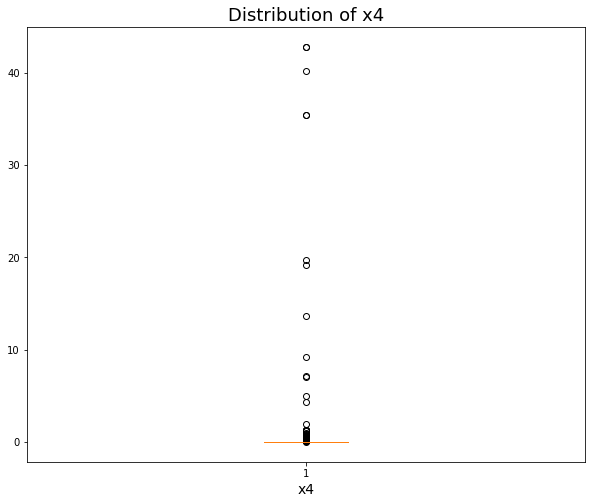

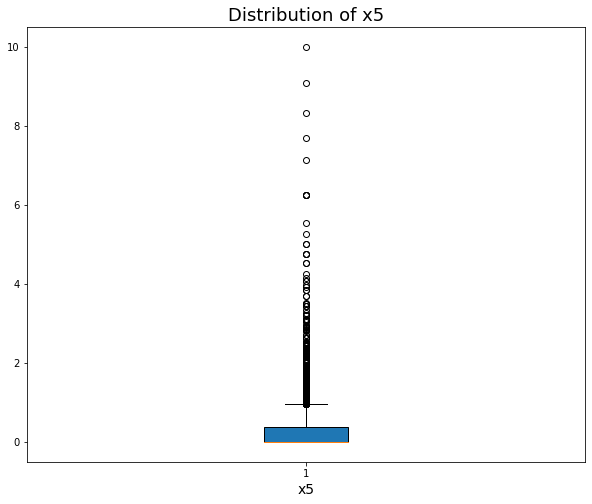

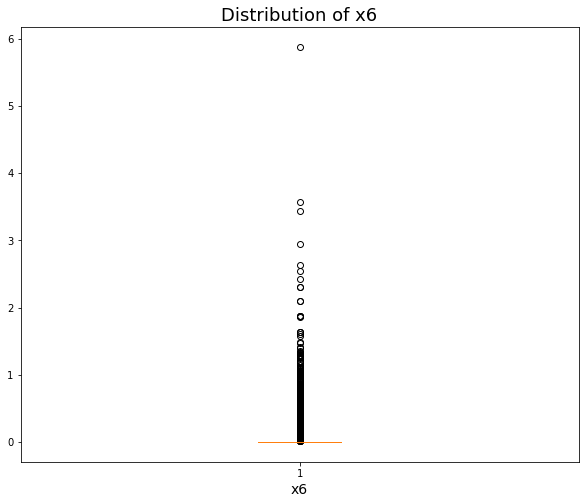

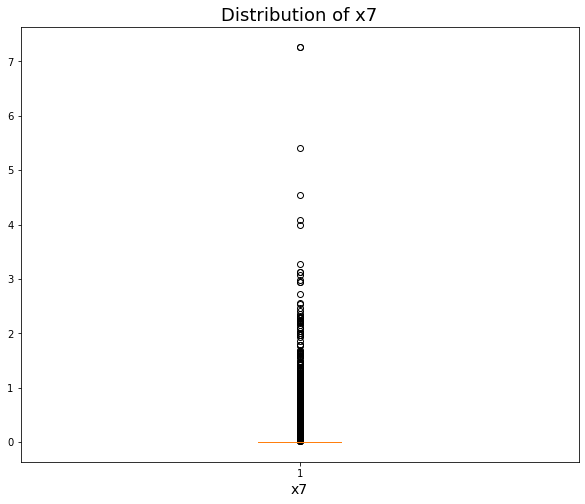

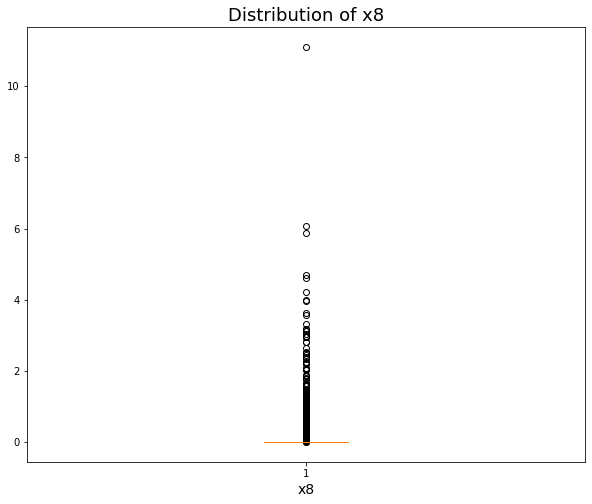

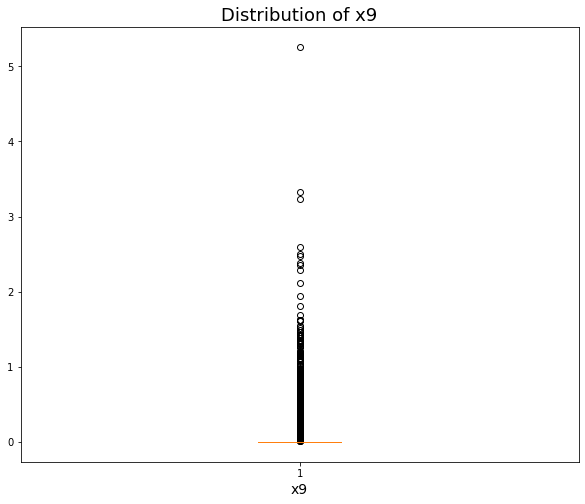

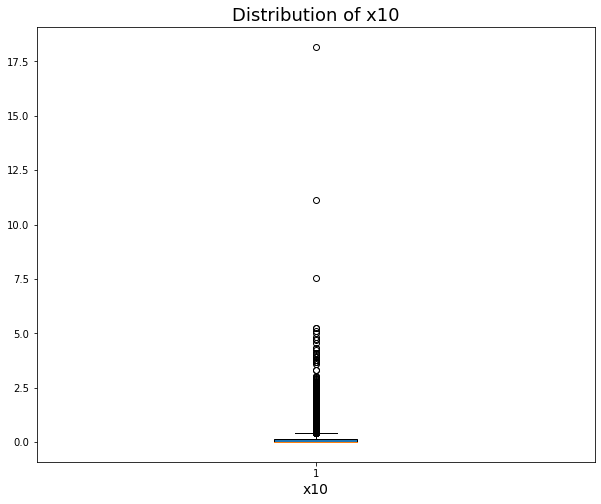

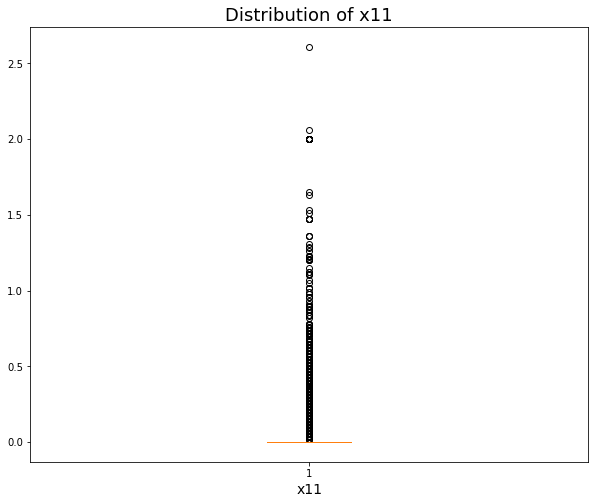

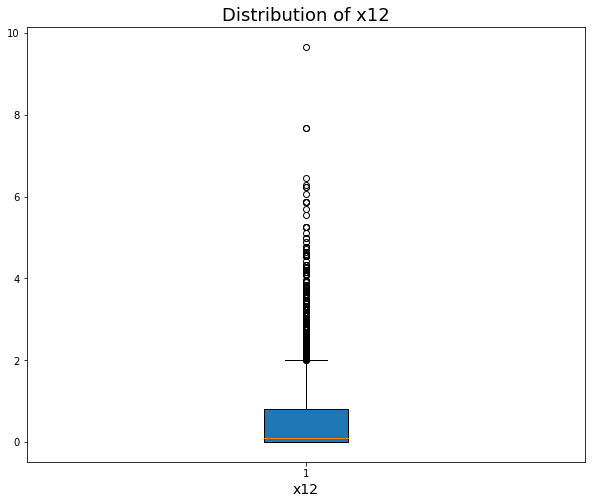

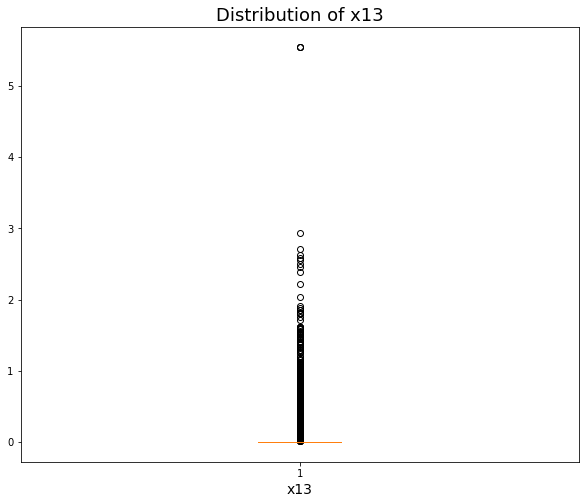

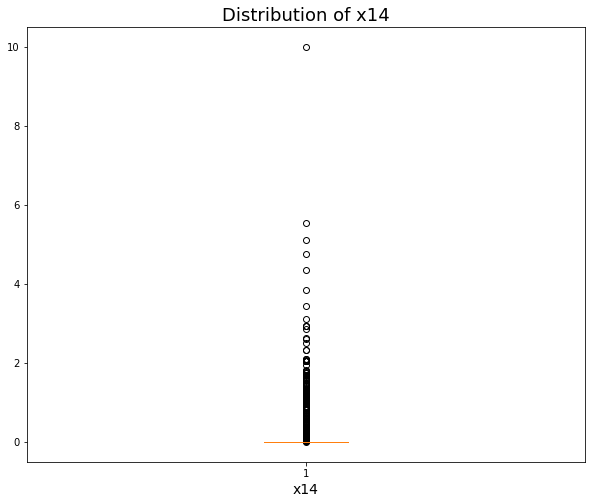

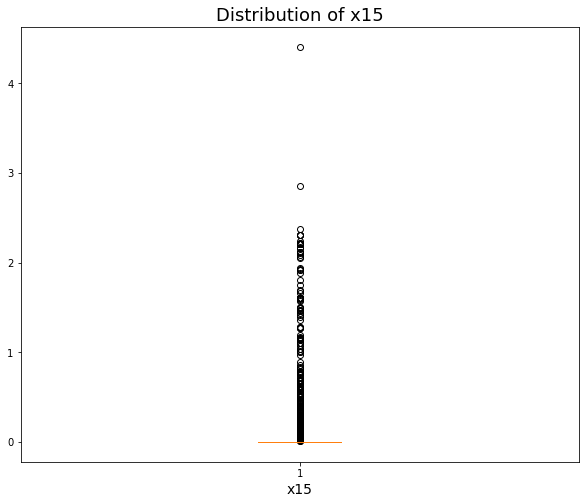

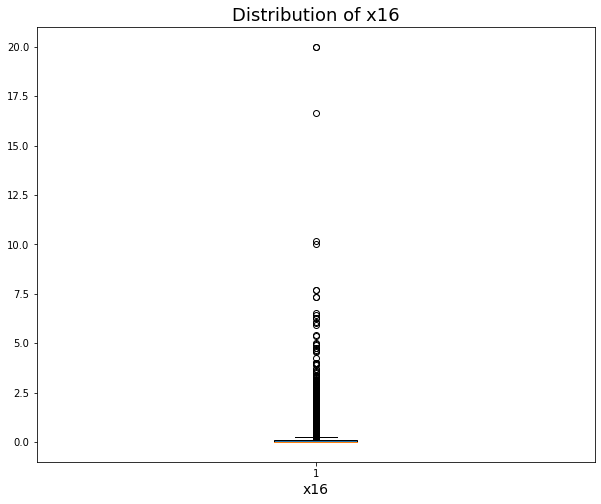

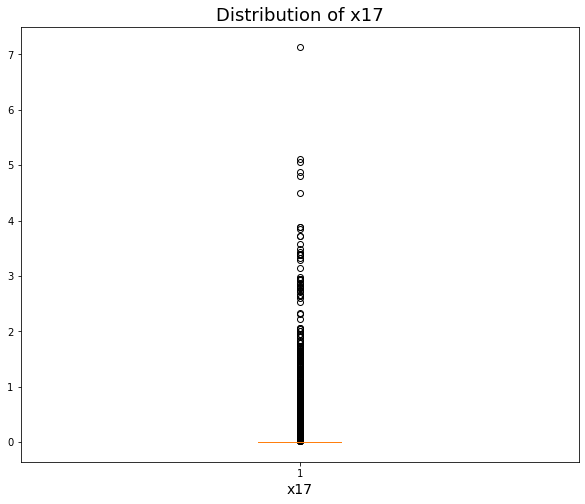

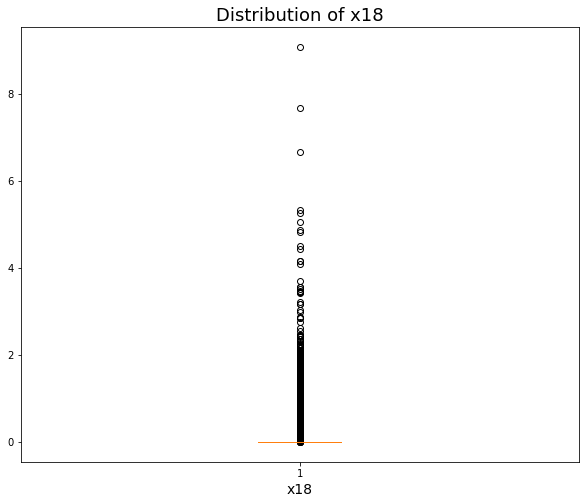

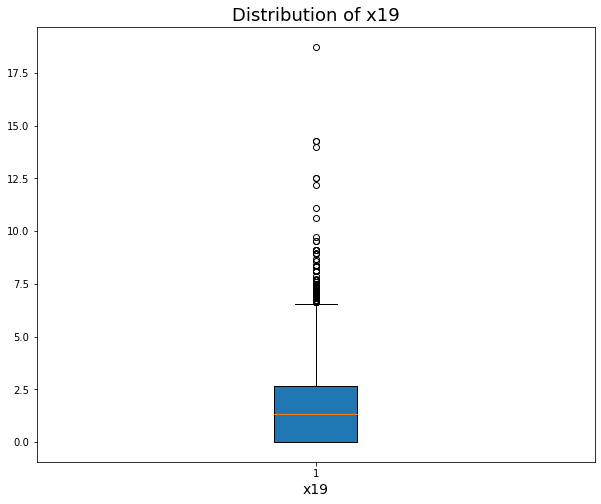

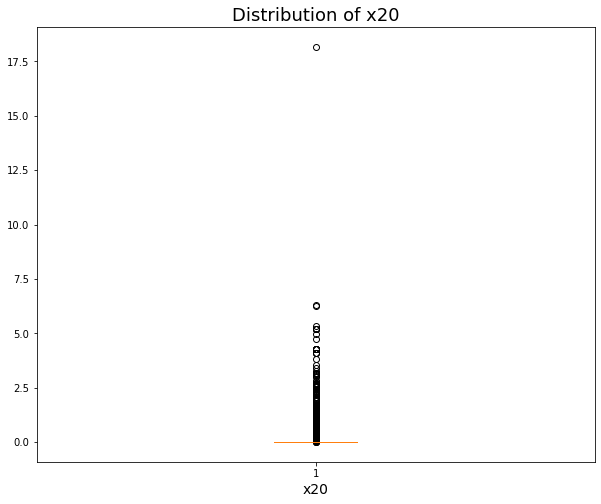

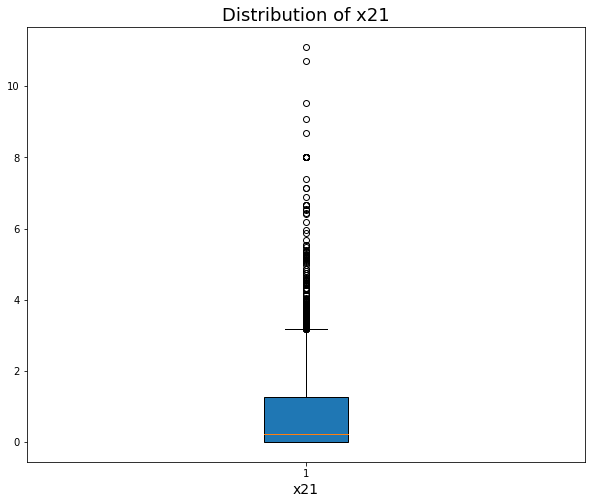

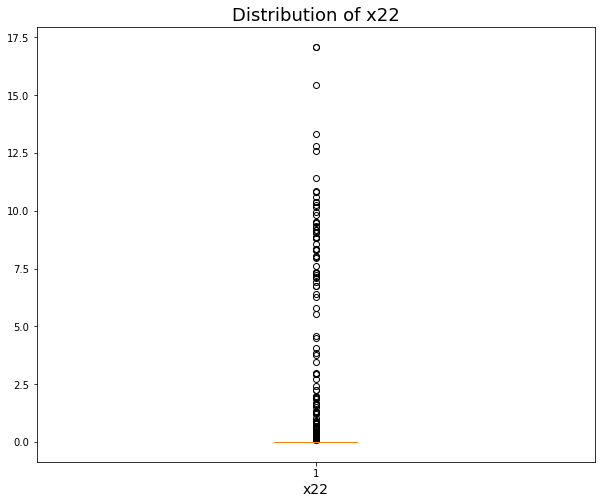

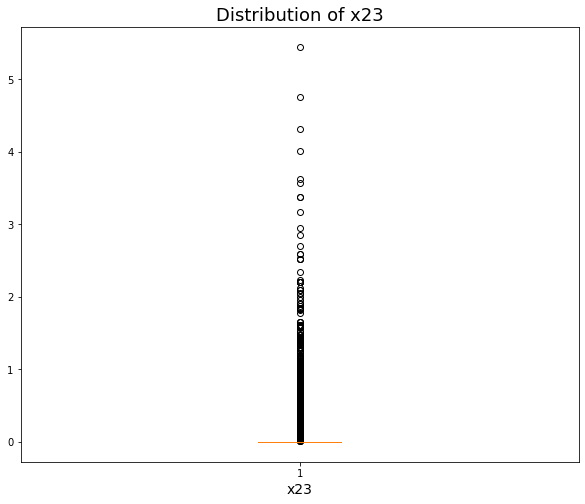

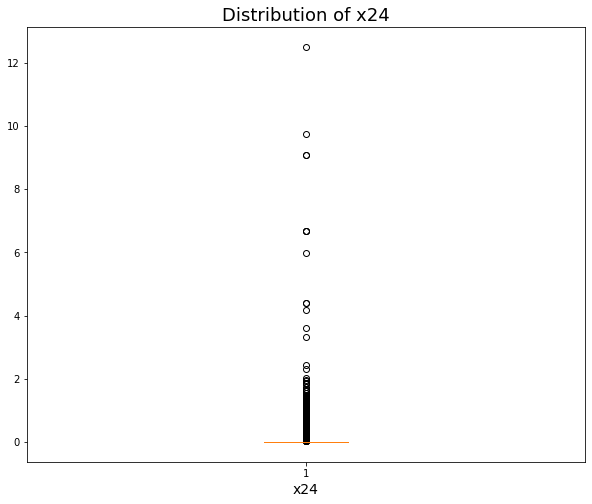

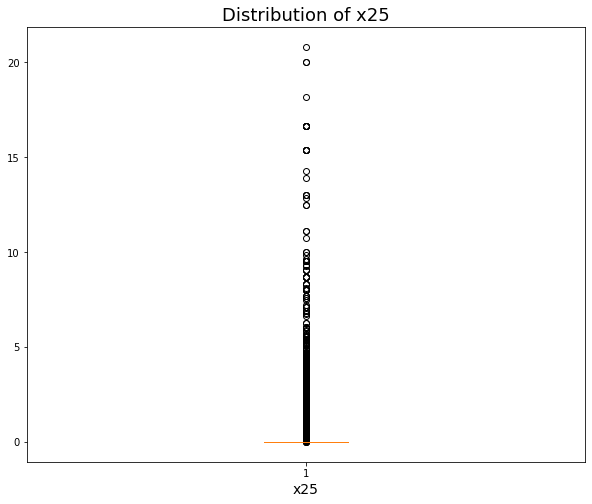

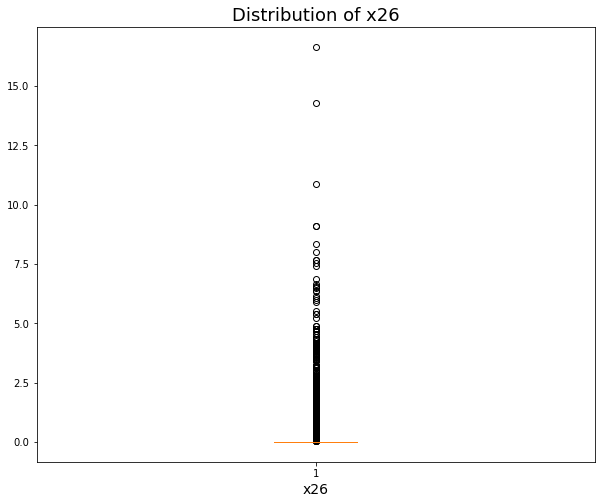

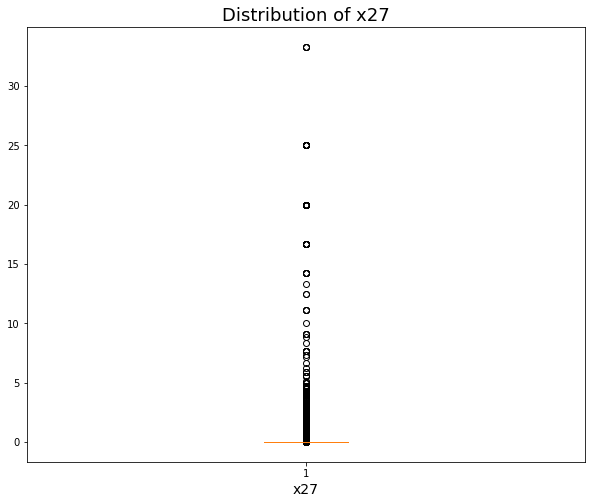

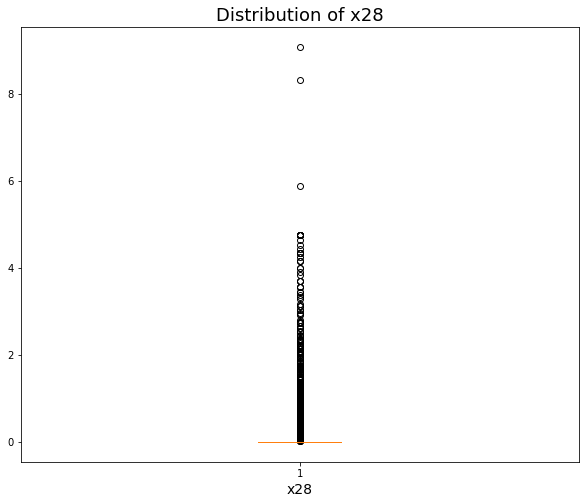

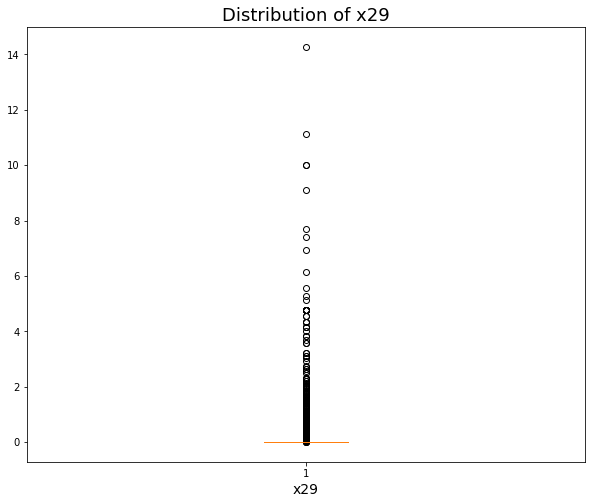

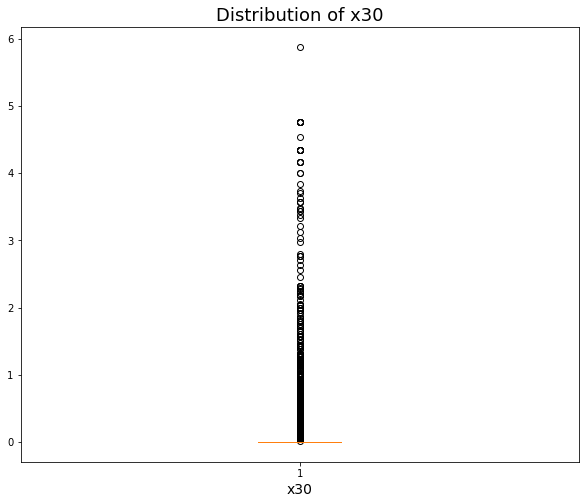

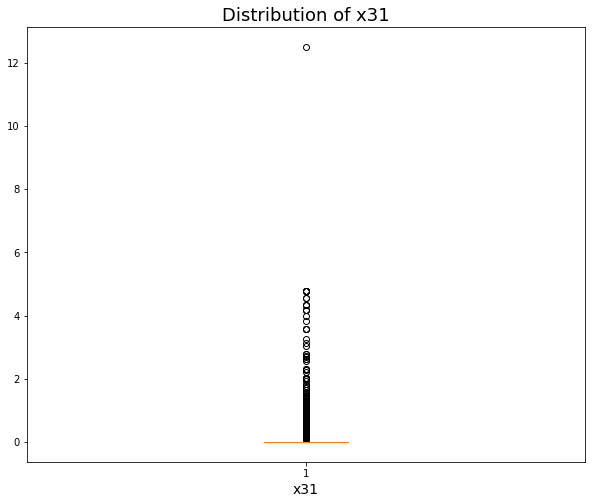

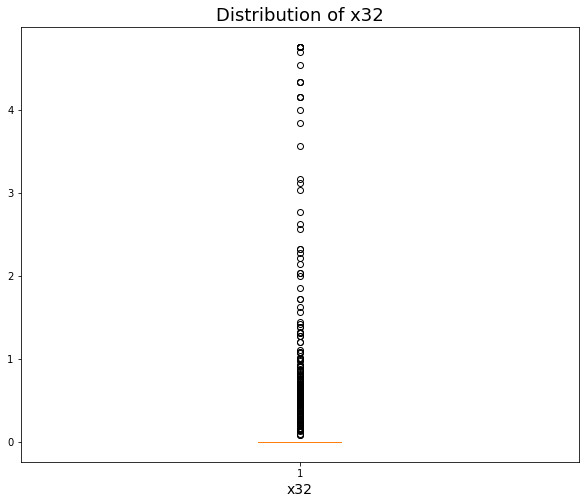

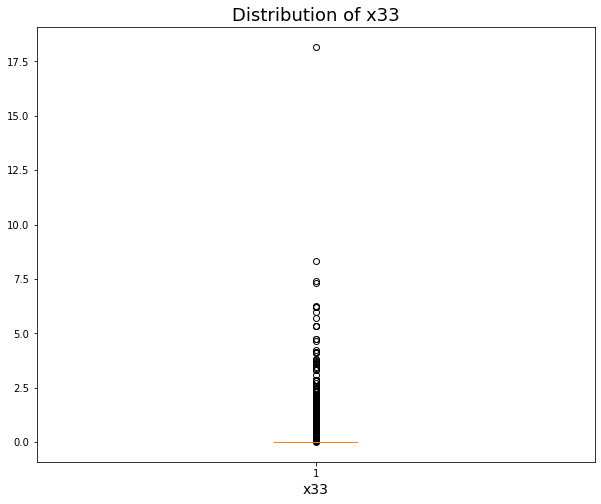

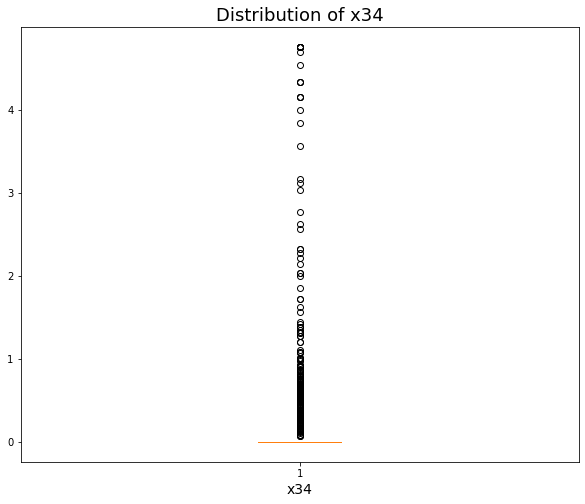

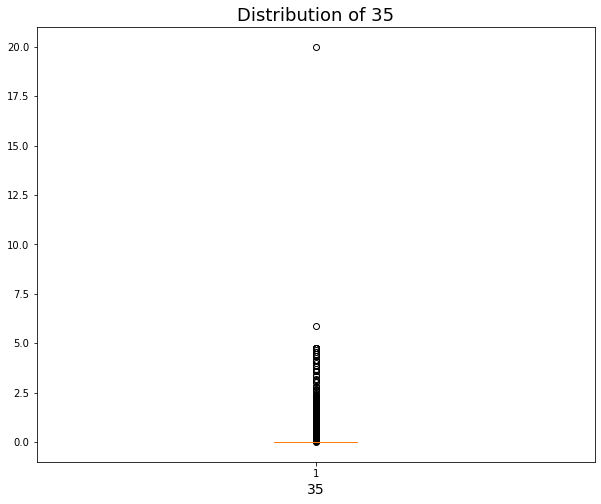

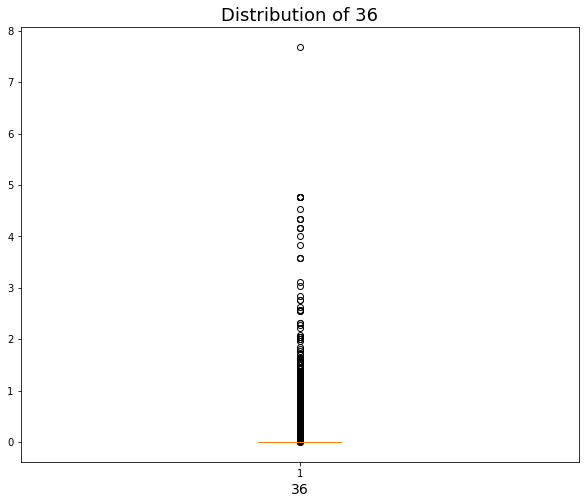

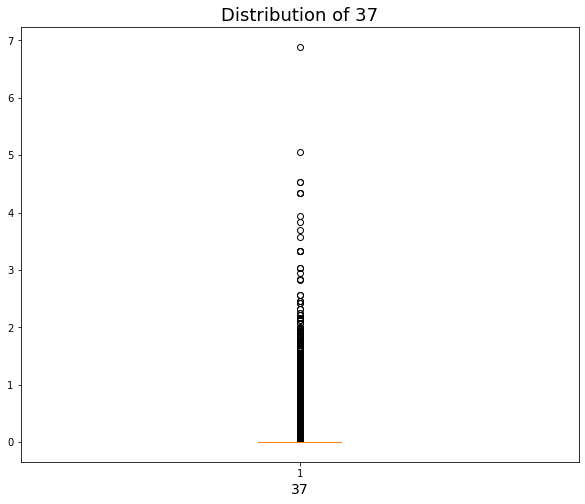

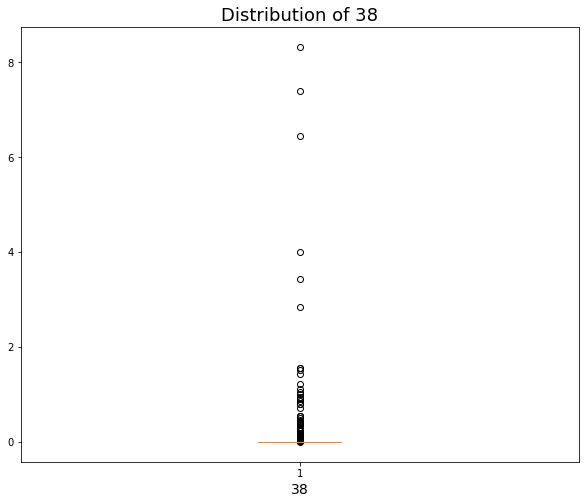

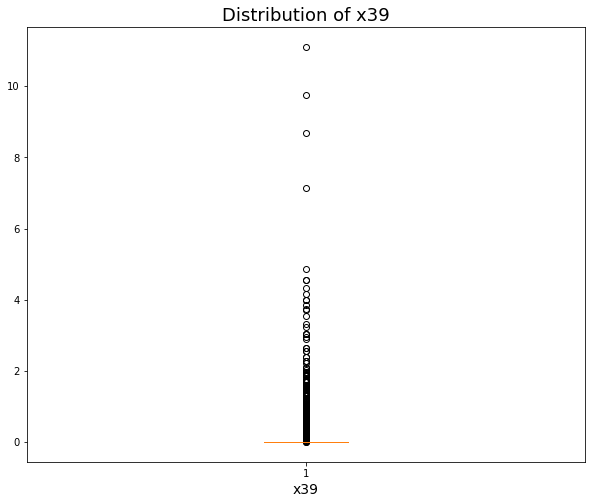

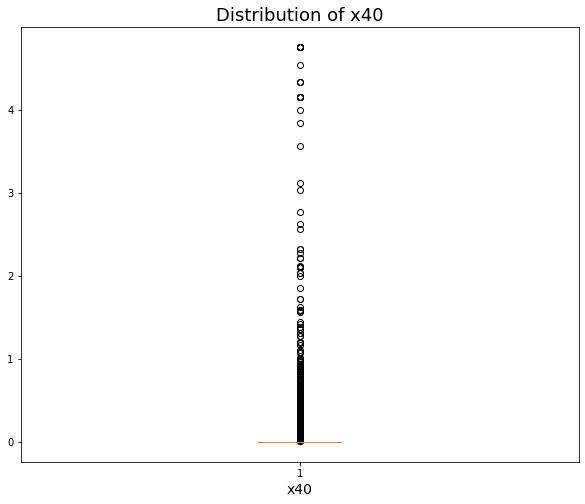

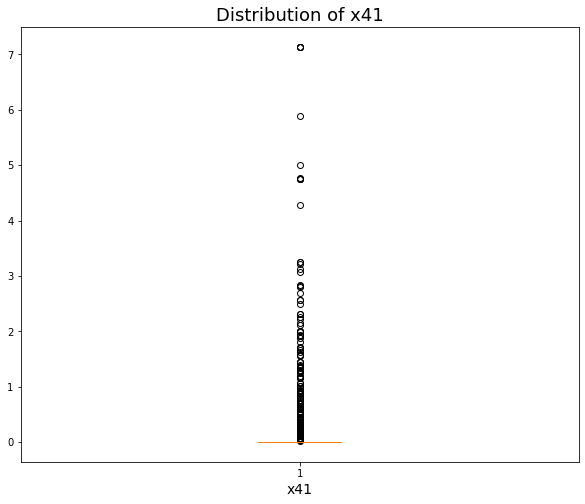

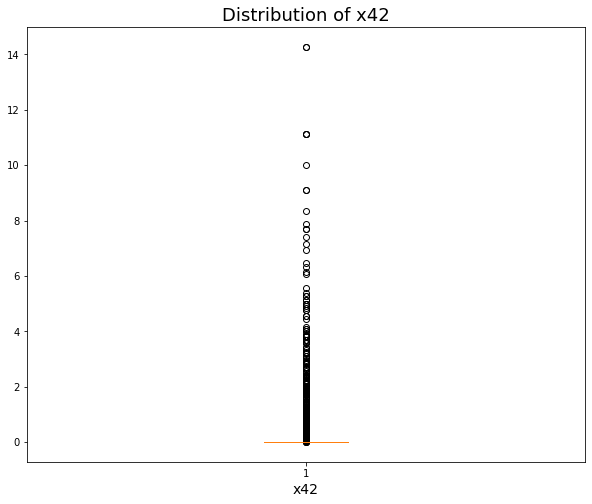

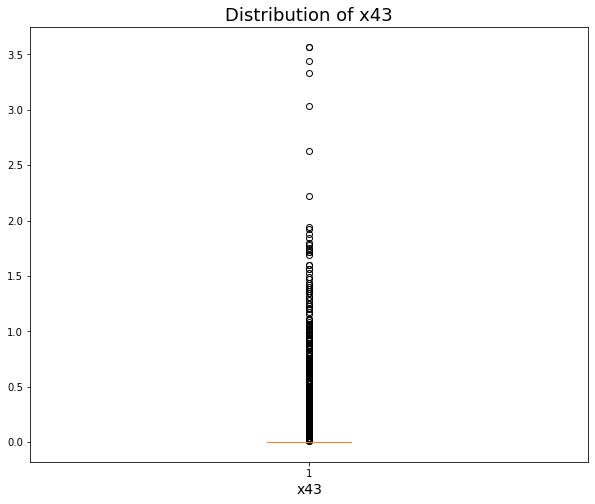

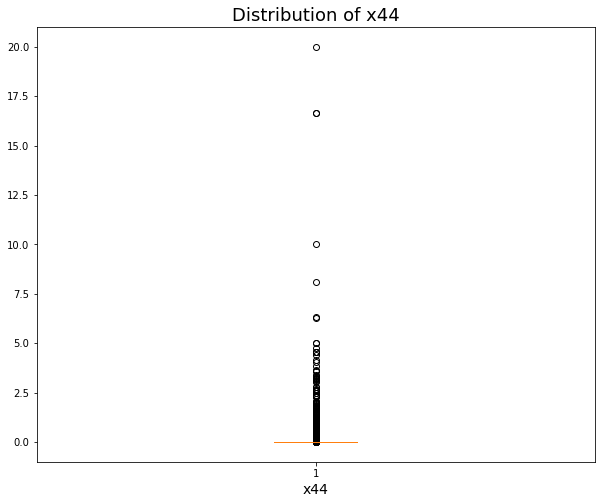

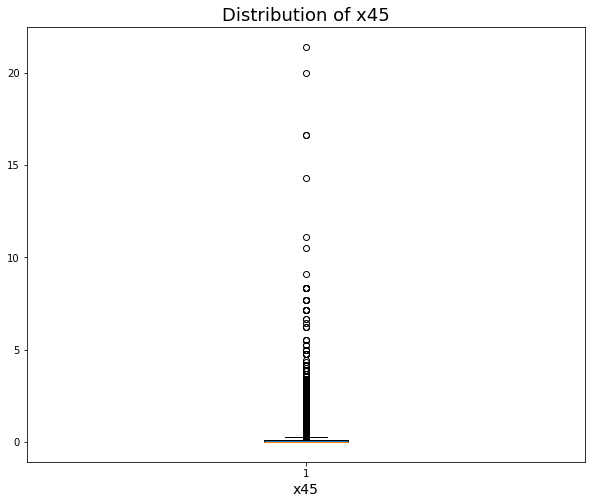

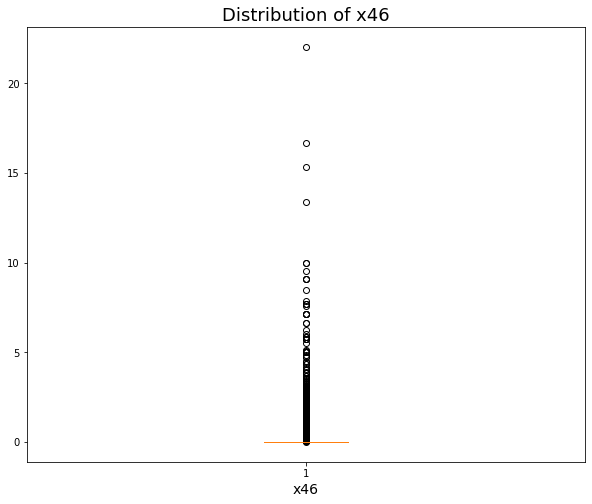

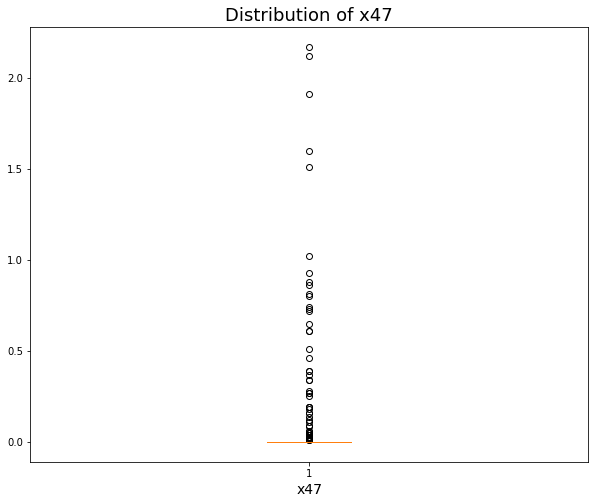

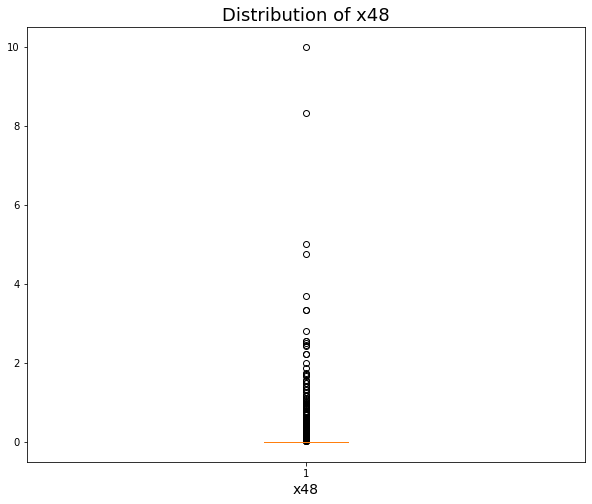

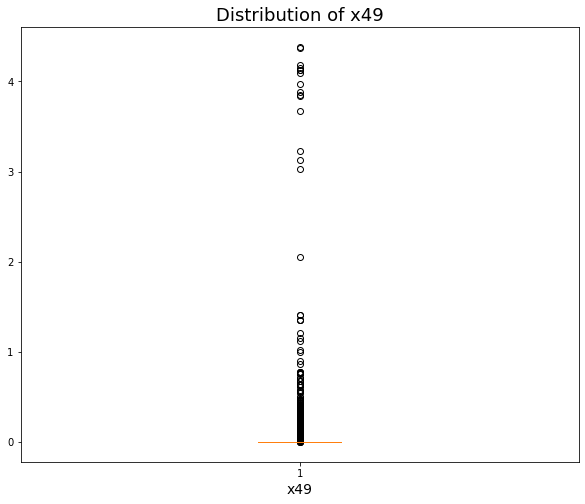

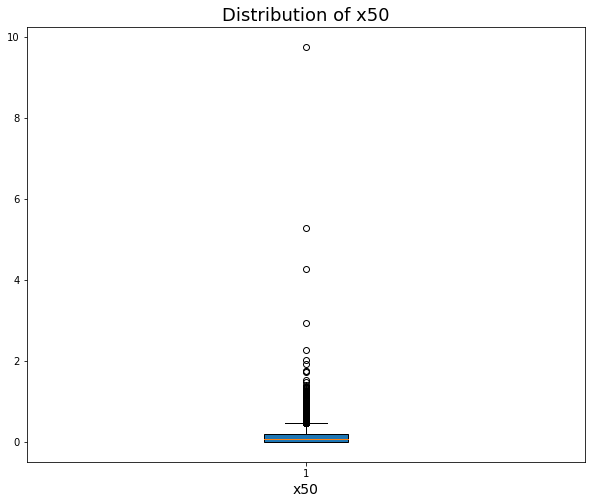

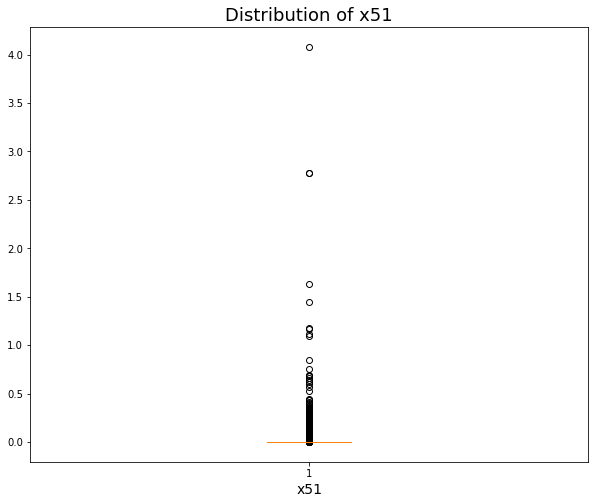

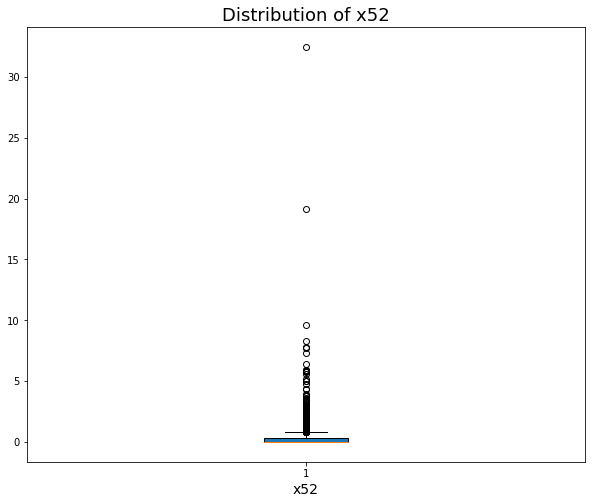

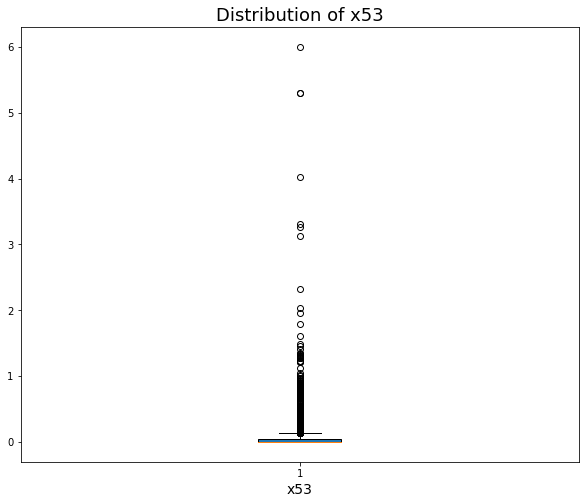

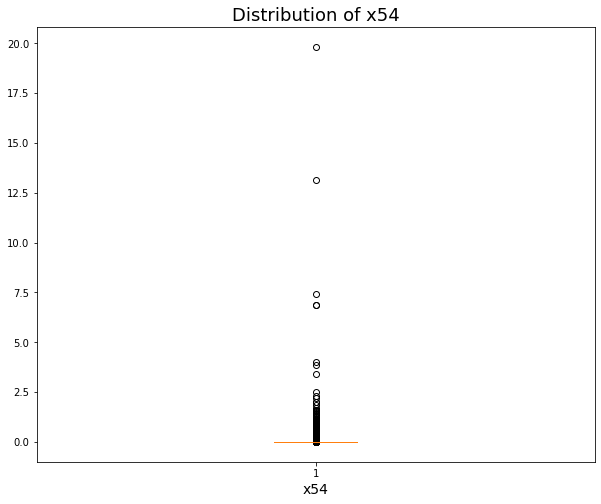

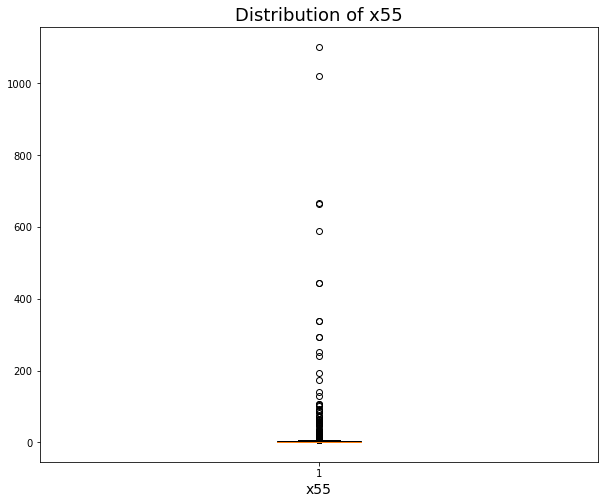

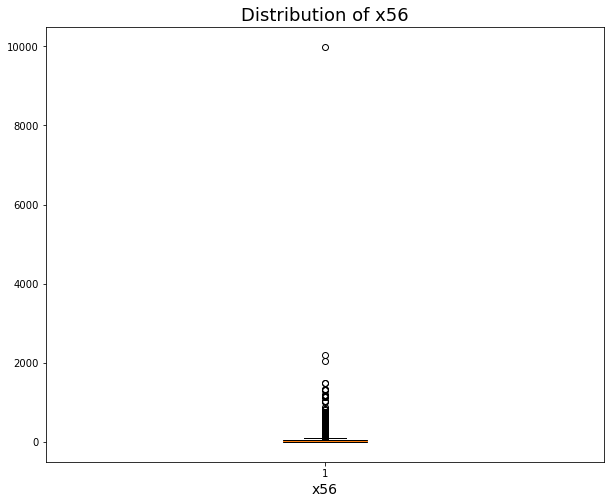

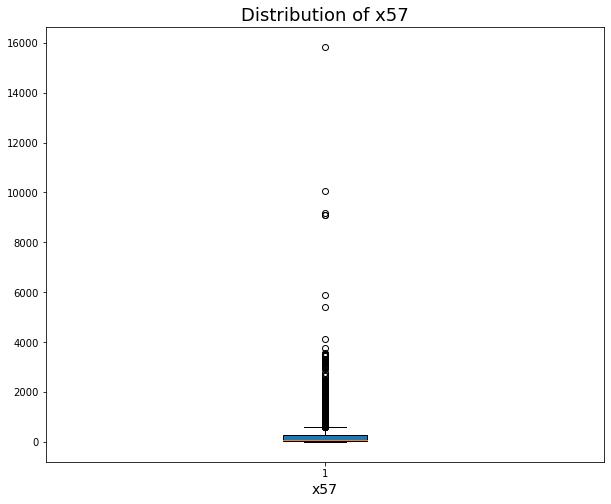

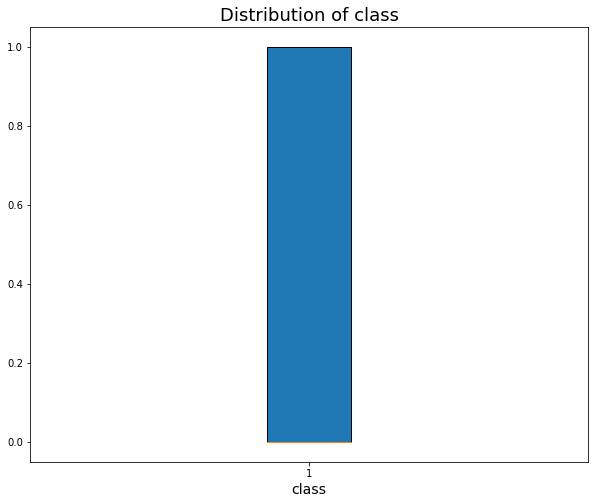

In [22]:
for col in df_spam.columns:    
    figure = plt.figure(figsize=(10, 8))
    axes = figure.add_subplot(1, 1, 1)
    
    patch = axes.boxplot(df_spam[col], showfliers=True, patch_artist=True, zorder=1)
    axes.set_title("Distribution of " + str(col), fontsize = 18)
    axes.set_xlabel(str(col), fontsize = 14)
    plt.show()

In [23]:
sud_df =df_spam[['x7', 'x16', 'x25', 'x39','x52', 'x53', 'class']]

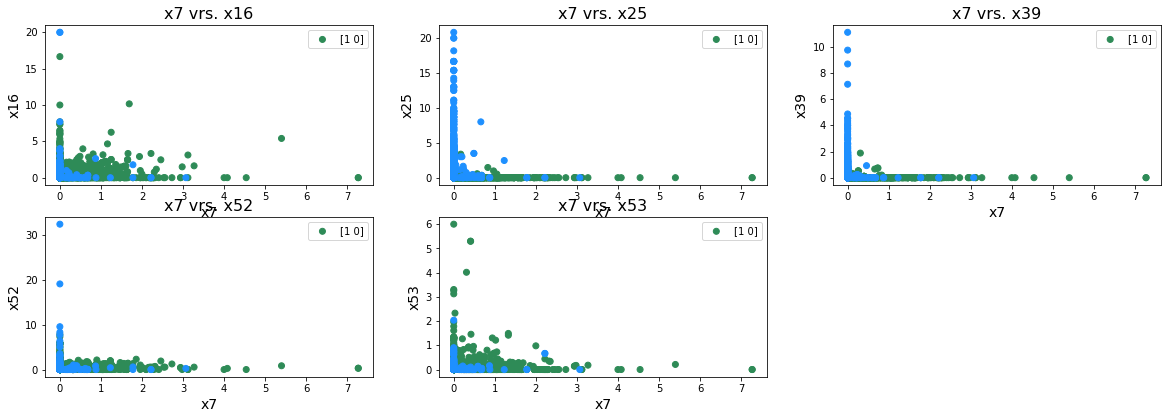

In [24]:
figure = plt.figure(figsize=(20,10))
i = 1
for col in sud_df.columns:
    if ((col == "class") or (col == "x7")):
        continue
    axes = figure.add_subplot(3, 3, i)
    labels = [0, 1]
    colors = sud_df["class"].apply(lambda x: "DodgerBlue" if x ==0  else 'seagreen')
    axes.scatter(sud_df["x7"], sud_df[col],  color = colors, label = sud_df["class"].unique())
    axes.set_title("x7 vrs. " + str(col),  fontsize  = 16)
    axes.set_xlabel( "x7",  fontsize  = 14)
    axes.set_ylabel(str(col),  fontsize  = 14)
    i = i+1
    axes.legend()

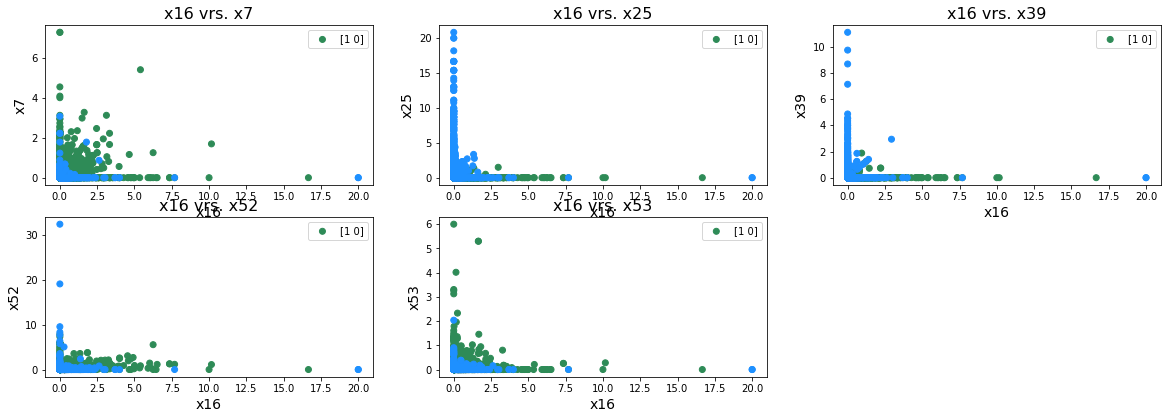

In [25]:
figure = plt.figure(figsize=(20,10))
i = 1
for col in sud_df.columns:
    if ((col == "class") or (col == "x16")):
        continue
    axes = figure.add_subplot(3, 3, i)
    labels = [0, 1]
    colors = sud_df["class"].apply(lambda x: "DodgerBlue" if x ==0  else 'seagreen')
    axes.scatter(sud_df["x16"], sud_df[col],  color = colors, label = sud_df["class"].unique())
    axes.set_title("x16 vrs. " + str(col),  fontsize  = 16)
    axes.set_xlabel( "x16",  fontsize  = 14)
    axes.set_ylabel(str(col),  fontsize  = 14)
    i = i+1
    axes.legend()

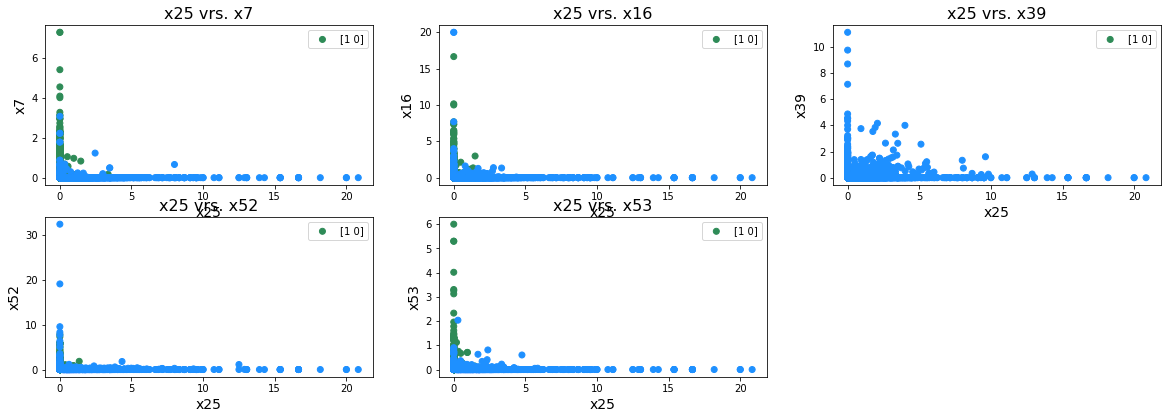

In [26]:
figure = plt.figure(figsize=(20,10))
i = 1
for col in sud_df.columns:
    if ((col == "class") or (col == "x25")):
        continue
    axes = figure.add_subplot(3, 3, i)
    labels = [0, 1]
    colors = sud_df["class"].apply(lambda x: "DodgerBlue" if x ==0  else 'seagreen')
    axes.scatter(sud_df["x25"], sud_df[col],  color = colors, label = sud_df["class"].unique())
    axes.set_title("x25 vrs. " + str(col),  fontsize  = 16)
    axes.set_xlabel( "x25",  fontsize  = 14)
    axes.set_ylabel(str(col),  fontsize  = 14)
    i = i+1
    axes.legend()

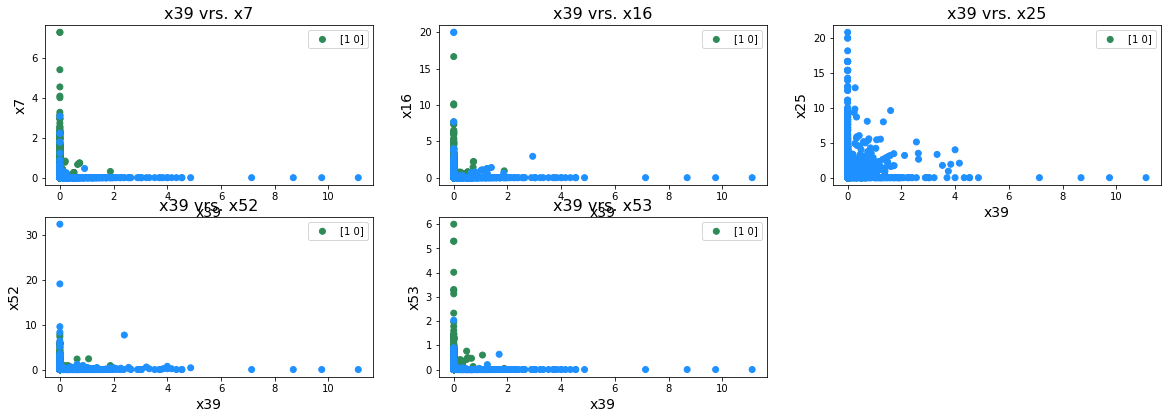

In [27]:
figure = plt.figure(figsize=(20,10))
i = 1
for col in sud_df.columns:
    if ((col == "class") or (col == "x39")):
        continue
    axes = figure.add_subplot(3, 3, i)
    labels = [0, 1]
    colors = sud_df["class"].apply(lambda x: "DodgerBlue" if x ==0  else 'seagreen')
    axes.scatter(sud_df["x39"], sud_df[col],  color = colors, label = sud_df["class"].unique())
    axes.set_title("x39 vrs. " + str(col),  fontsize  = 16)
    axes.set_xlabel( "x39",  fontsize  = 14)
    axes.set_ylabel(str(col),  fontsize  = 14)
    i = i+1
    axes.legend()

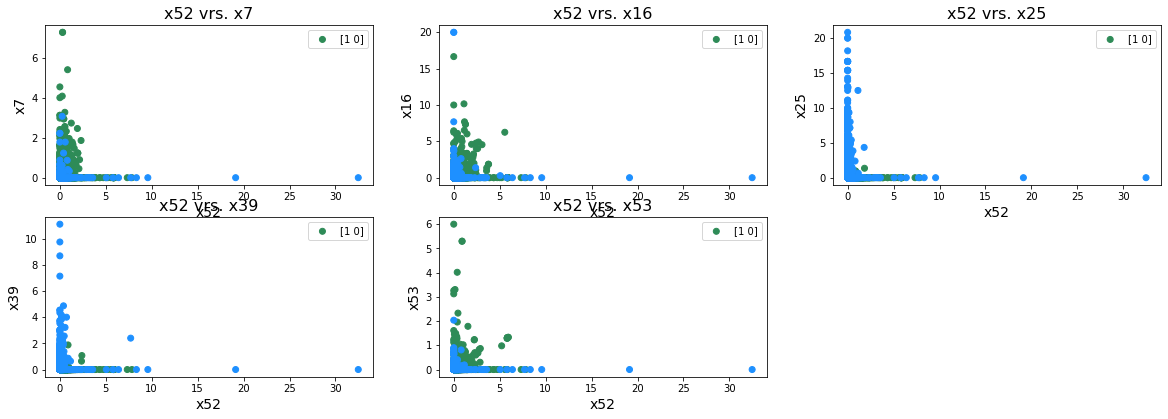

In [28]:
figure = plt.figure(figsize=(20,10))
i = 1
for col in sud_df.columns:
    if ((col == "class") or (col == "x52")):
        continue
    axes = figure.add_subplot(3, 3, i)
    labels = [0, 1]
    colors = sud_df["class"].apply(lambda x: "DodgerBlue" if x ==0  else 'seagreen')
    axes.scatter(sud_df["x52"], sud_df[col],  color = colors, label = sud_df["class"].unique())
    axes.set_title("x52 vrs. " + str(col),  fontsize  = 16)
    axes.set_xlabel( "x52",  fontsize  = 14)
    axes.set_ylabel(str(col),  fontsize  = 14)
    i = i+1
    axes.legend()

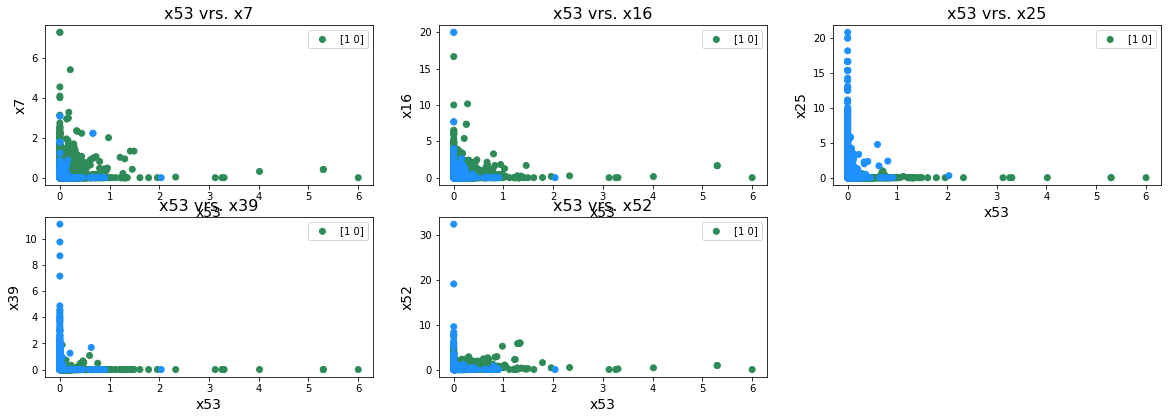

In [29]:
figure = plt.figure(figsize=(20,10))
i = 1
for col in sud_df.columns:
    if ((col == "class") or (col == "x53")):
        continue
    axes = figure.add_subplot(3, 3, i)
    labels = [0, 1]
    colors = sud_df["class"].apply(lambda x: "DodgerBlue" if x ==0  else 'seagreen')
    axes.scatter(sud_df["x53"], sud_df[col],  color = colors, label = sud_df["class"].unique())
    axes.set_title("x53 vrs. " + str(col),  fontsize  = 16)
    axes.set_xlabel( "x53",  fontsize  = 14)
    axes.set_ylabel(str(col),  fontsize  = 14)
    i = i+1
    axes.legend()

### 3. Standardize the data
Scale the feature to have mean of 0 and standard deviation of 1.We will not scale the class feature

In [30]:
#synthetic data
def feature_scaling(df):
    for column in df.columns:
        df[column] = (df[column] - df[column].mean())/df[column].std()
    return df

sub = df_syn_filtered.drop("class", axis=1)

df_stand1 = feature_scaling(sub)

df_stand1["class"] = df_syn_filtered["class"]

In [31]:
#spam email data
sub = df_spam.drop("class", axis=1)

df_stand2 = feature_scaling(sub)

df_stand2["class"] = df_spam["class"]

In [32]:
df_stand2.sample(frac = 1).head(10)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x49,x50,x51,x52,x53,x54,x55,x56,x57,class
15,-0.342396,0.160382,0.276397,-0.046894,1.424176,-0.350228,0.781195,-0.262533,-0.323267,1.598415,...,-0.158436,-0.281224,-0.155181,0.371386,-0.052101,-0.103037,0.014733,0.014507,-0.056551,1
3196,0.083334,-0.165054,-0.159987,-0.046894,0.338695,0.124529,-0.291762,0.061599,1.112401,-0.371324,...,-0.121471,-0.262730,-0.155181,-0.329876,0.366799,-0.103037,-0.075246,-0.036804,0.550362,0
2310,-0.342396,0.028658,-0.318672,-0.046894,0.085911,-0.350228,-0.291762,0.036666,-0.323267,0.202537,...,-0.092720,-0.329309,-0.155181,-0.268577,-0.308321,-0.103037,-0.087537,-0.139425,0.138057,0
3858,-0.342396,-0.165054,-0.556700,-0.046894,-0.464264,-0.350228,-0.291762,-0.262533,-0.323267,-0.371324,...,-0.158436,1.009669,-0.155181,-0.329876,-0.308321,-0.103037,-0.094093,-0.170212,-0.256106,0
2743,-0.342396,-0.165054,-0.556700,-0.046894,-0.464264,-0.350228,-0.291762,0.709862,-0.323267,-0.371324,...,-0.158436,-0.333008,-0.155181,-0.329876,-0.308321,-0.103037,-0.100585,-0.072722,-0.262703,0
3736,-0.342396,-0.165054,-0.556700,-0.046894,0.874001,-0.350228,-0.291762,-0.262533,-0.323267,-0.371324,...,-0.158436,1.146526,-0.155181,-0.329876,-0.308321,-0.103037,-0.095858,-0.211260,-0.396289,0
1892,-0.342396,-0.165054,-0.556700,-0.046894,-0.464264,-0.350228,-0.291762,-0.262533,-0.323267,-0.371324,...,-0.158436,1.105839,-0.155181,-0.329876,-0.308321,-0.103037,-0.086466,-0.077853,-0.269300,0
2936,-0.342396,-0.165054,-0.556700,-0.046894,-0.464264,-0.350228,-0.291762,-0.262533,-0.323267,-0.371324,...,-0.158436,-0.514251,-0.155181,-0.329876,-0.308321,-0.103037,-0.100585,-0.206129,-0.378148,0
2668,0.050585,-0.165054,0.633439,-0.046894,0.427912,-0.350228,-0.291762,-0.262533,-0.323267,-0.371324,...,-0.092720,0.033177,-0.155181,-0.289419,-0.243250,-0.103037,-0.098820,0.065817,0.133110,0
4056,-0.342396,-0.165054,-0.556700,-0.046894,-0.464264,-0.350228,-0.291762,-0.262533,-0.323267,-0.371324,...,-0.158436,-0.514251,-0.155181,-0.027059,-0.308321,-0.103037,-0.110544,-0.242047,-0.414431,0


### 4. Set up your test and training sets from the provided data. Specifically, split the data into two groups randomly where 2/3 of the data will be used for training and 1/3 will be used for testing.

#### Synthetic data

In [33]:
fraction = 2/3
seed = 1600307489

#randomly sample the training data 
train1 = df_stand1.sample(frac = fraction, random_state=seed, axis=0 )

#get test data by removing the training data from its total data set
test1 = df_stand1[~df_stand1.index.isin(train1.index)].reset_index(drop=True)

train1 = train1.reset_index(drop=True)

In [34]:
X_train1 = train1.drop("class", axis = 1).astype(float)
X_test1  = test1.drop("class", axis = 1).astype(float)

y_train1 = train1["class"]
y_test1  = test1["class"]

In [35]:
X_train1.shape[0]

6667

#### spam data

In [36]:
fraction = 2/3
seed = 1600307489

#randomly sample the training data 
train2 = df_stand2.sample(frac = fraction, random_state=seed, axis=0 )

#get test data by removing the training data from its total data set
test2 = df_stand2[~df_stand2.index.isin(train2.index)].reset_index(drop=True)

train2 = train2.reset_index(drop=True)

In [37]:
X_train2 = train2.drop("class", axis = 1).astype(float)
X_test2  = test2.drop("class", axis = 1).astype(float)

y_train2 = train2["class"]
y_test2  = test2["class"]

In [38]:
X_train2.shape[0]

3067

## 5. Feature selection - Stepwise forward selection

The stepwise_forward_selection function takes five inputs: the training X data set, test X data set, training y, test y, and threshold. The default threshold is 0.0001 error to decide optimal model.

first iterates through allthe features to find the feature that gives best model score metric. Keep the best found feature
Perform pair-wise iteration of the best feature with all features to find the best two features iterate to find the best 3 features, so on. In each iteration, check model score metric against previous score metric. If the difference in core is not greater than the threshold, return all best features found.

@return results data frame

In [39]:
from  classification_model_selection import ModelSelctions as ms

#### Synthetic data

In [40]:
feature_sel1 =  ms.stepwise_forward_selection(X_train1, X_test1, y_train1, y_test1, threshold = 0.0001)

features count = 1
best feature = x4
score with feature added = 1.0
error with feature added = 0.0


In [41]:
feature_sel1

,iter_features,accuracy,feature_count,best_features,error_rate
0,['x4'],1.000000,1,x4,0.000000


We have 1 selected feature for the synthetic data

#### Spam email data

In [42]:
feature_sel2 =  ms.stepwise_forward_selection(X_train2, X_test2, y_train2, y_test2, threshold = 0.0001)

features count = 1
best feature = x53
score with feature added = 0.7816166883963495
error with feature added = 0.21838331160365054
features count = 2
best feature = x25
score with feature added = 0.8285528031290743
error with feature added = 0.1714471968709257
features count = 3
best feature = x7
score with feature added = 0.8500651890482399
error with feature added = 0.1499348109517601
features count = 4
best feature = x39
score with feature added = 0.8748370273794003
error with feature added = 0.12516297262059972
features count = 5
best feature = x16
score with feature added = 0.8852672750977836
error with feature added = 0.11473272490221642
features count = 6
best feature = x52
score with feature added = 0.8956975228161669
error with feature added = 0.10430247718383312


In [43]:
feature_sel2

,iter_features,accuracy,feature_count,best_features,error_rate
0,['x53'],0.781617,1,x53,0.218383
1,"['x53', 'x25']",0.828553,2,x25,0.171447
2,"['x53', 'x25', 'x7']",0.850065,3,x7,0.149935
3,"['x53', 'x25', 'x7', 'x39']",0.874837,4,x39,0.125163
4,"['x53', 'x25', 'x7', 'x39', 'x16']",0.885267,5,x16,0.114733
5,"['x53', 'x25', 'x7', 'x39', 'x16', 'x52']",0.895698,6,x52,0.104302


We have 6 selected features for the spam email data 

### 6.1. Naive Bayes Claifficantion

In [44]:
from  naive_bayes_algorithm import Naive_Bayes_Classifier

from classification_models_performance import Model_Performance 

#### Synthetic data

In [45]:
nb_model=Naive_Bayes_Classifier()
X_train1_array = np.array(X_train1[["x1","x4"]])
X_test1_array  = np.array(X_test1[["x1","x4"]])

y_train1_array = y_train1
y_test1_array  = y_test1

#fit the model
nb_model.fit(X_train1_array,y_train1_array)

#predict the data class
nb_results1=nb_model.predict(X_test1_array)

#add the actuals to our results data set
nb_results1["y_actual"] = y_test1_array

#calculate model accuracy
Model_Performance.scores(nb_results1)

{'accuracy': 1.0,
 'error_rate': 0.0,
 'RMS': 0.0,
 'sensitivity': 1.0,
 'precision': 1.0,
 'specificity': 1.0,
 'F_1': 1.0}

#### Spam email data

In [46]:
nb_model=Naive_Bayes_Classifier()
X_train2_array = np.array(X_train2[['x53', 'x25', 'x7', 'x39', 'x16', 'x52']])
X_test2_array  = np.array(X_test2[['x53', 'x25', 'x7', 'x39', 'x16', 'x52']])

y_train2_array = y_train2
y_test2_array  = y_test2

#fit the model
nb_model.fit(X_train2_array,y_train2_array)

#predict the data class
nb_results2=nb_model.predict(X_test2_array)

#add the actuals to our results data set
nb_results2["y_actual"] = y_test2_array

#calculate model accuracy
Model_Performance.scores(nb_results2)

{'accuracy': 0.8956975228161669,
 'error_rate': 0.10430247718383312,
 'RMS': 0.3229589403992915,
 'sensitivity': 0.8120689655172414,
 'precision': 0.9022988505747126,
 'specificity': 0.9465408805031447,
 'F_1': 0.8548094373865699}

## 6.2. Write the hierarchical agglomerative clustering algorithm

Follow the steps outlined above in the beginning

1. Scale the data (𝜇=0, 𝜎=1) and remove outliers (if any)
2. Define each single data point as its own cluster
3. Calculate the Euclidian distances between every cluster and every other cluster
4. Combine the two clusters that have the smallest distance, reducing the number of clusters by one
    The smallest distance is chosen using the single-link or complete-link clsutering 
5. Repeat steps 2 & 3 until all clusters have been merged into a single cluster which contains all of the data points
6. The single link measures the distance between two clusters as the closest distance between ANY two points given that the two points are not from the same cluster.

In [57]:
class Hierarchical_agglomerative_clustering():

    def __init__(self):
        pass
    
    def squared_euclidean_distance(self,X1,X2):
        '''
        X1 and X2 can both be data samples, or data sample and a cluster, or cluster and cluster.
        For cases where X1 and X2 are samples or clusters, we can use the
        If both of them are samples/clusters, then simple norm is used. In other 
        cases, we refer it as an exception case and pass the samples as parameter to some function that 
        calculates the necessary distance between cluster and a sample
        '''            
        distance = []
        try:
            distance.append(sum((X1-X2)**2))     
        except:
            #distance between elements in different clusters
            distance.append(self.cluster_distance(X1,X2)) 
                    
        return min(distance)
    
    def cluster_distance(self,X1,X2):
        '''
        This function computes the distance between cluster elements and the actual sample.
        1. first determine which cluster is the bigger one, then compare the elements in the bigger cluster to elements
        in the smaller cluster.
        2. It determines if elements have already been clustered to calculate the intracluster distance
        3. if not already within the bigger cluster, calculate intercluster distance
        '''
        if not isinstance(X1[0], list):
            X1=[X1]
        if not isinstance(X2[0], list):
            X2=[X2]
        N1, N2 = len(X1), len(X2)
        
        distance = []
        if N2>=N1:
            for i in range(N2):
                for j in range(N1):                    
                    if (len(X2[i])>=len(X1[j])) and not isinstance(X2[i][0], list):
                        #if elements are not already in the bigger cluster, calculate the intercluster distance
                        distance.append(self.inter_cluster_distance(X2[i],X1[j])) 
                    else:
                        #distance.append(sum((X2[i]-X1[j])**2)) #distance within cluster
                        distance.extend(sum((b-a)**2) for b, a in zip(X2[i], X1[j]))
        else:
            for i in range(N1):
                for j in range(N2):
                    if (len(X1[i])>=len(X2[j])) and not isinstance(X1[i][0], list): 
                        distance.append(self.inter_cluster_distance(X1[i],X2[j]))
                    else:
                        distance.extend(sum((a-b)**2) for a, b in zip(X1[i], X2[j]))
        return float(min(distance))
    
    def inter_cluster_distance(self,cluster,X):
        """
        this function calculates the distance between elements in the bigger cluster
        and elements in the smaller cluster.
        """
        if not isinstance(X[0], list):
            X = [X]
        if not isinstance(cluster[0], list):
            cluster = [cluster]
            
        distance   = []
        for i in range(len(cluster)):            
            for j in range(len(X)): 
                distance.extend(sum((np.array(cluster)-np.array(X))**2))
                #distance.extend(sum((a-b)**2) for a, b in zip(cluster[i], X[j]))
        return min(distance)  
    
    def distance_matrices(self,X):
        '''
        create a matrix of the distance between instances and the clusters.
        The distance between the same point is zero but willl set that to a huge value to avoid
        selecting as the min distance
        '''
        distance_array = np.zeros((len(X),len(X))) #initialize the array
        
        for i in range(distance_array.shape[0]): #for row i in the data
            for j in range(distance_array.shape[0]): 
                if i == j: 
                    distance_array[i,j] = 999999 #for the same point 
                else:
                    #calculate distance between ith and jth rows
                    distance_array[i,j] = float(self.squared_euclidean_distance(X[i],X[j]))
        return distance_array 

In [58]:
def execution(data, hac):
    size = data.shape[0]
    current_clusters = [[list(data[i])] for i in range(size)] #individual data points as clusters
    
    cluster_size = len(current_clusters)
    
    print("start cluster = ", current_clusters)
    
    while len(current_clusters)>1:    

        distances      = hac.distance_matrices(current_clusters)#distance matrix
        
        #grab the index of the data points with minimum distance
        min_distance_index = np.where(distances==distances.min())[0]
        
        cluster1 = current_clusters[min_distance_index[0]][0]
        cluster2 = current_clusters[min_distance_index[1]][0]
        
        del current_clusters[min_distance_index[0]]
        del current_clusters[min_distance_index[1]]
        
        current_clusters[min_distance_index[0]] = [cluster1, cluster2] 
        
        print("min_distance_index = ",min_distance_index)
        print('cluster1 = ', cluster1)
        print('cluster2 = ', cluster2)
        print("start cluster size = ", len(current_clusters))
        print("start cluster = ", current_clusters)
        
    return current_clusters

In [59]:
hac  = Hierarchical_agglomerative_clustering()

X = np.array(X_train1[["x1","x4"]].sample(n=20))

cluster = execution(X, hac)

start cluster =  [[[-1.4363949578744415, 0.7471208879729212]], [[0.28722555459975985, 1.194825234500561]], [[0.8197630113530255, 1.194825234500561]], [[-0.9575272883654297, 1.095764696321571]], [[-1.3011169335141513, 0.7563995574212039]], [[1.4409033080496894, -1.0363596594845292]], [[1.4409033080496894, -0.6319318792899009]], [[-0.5006897358639094, 1.147378173453847]], [[-0.9937205378706574, 1.1445006342149122]], [[0.7996625711429279, -1.2012997704700572]], [[1.4409033080496894, -0.9605805345921017]], [[0.5233219479809886, -1.1240593123968832]], [[-1.2772574020504135, 0.8733784324071304]], [[-0.4529157836510607, -1.2012997704700572]], [[1.0519444709693082, -0.819609450988907]], [[0.939884476485633, -1.0640187709143214]], [[1.0190668426265037, -0.993957108086357]], [[-1.3724641022662225, 0.8764974201489423]], [[-1.4363949578744415, 1.1317399605809617]], [[0.31956909043746784, -0.9948967981632243]]]
min_distance_index =  [ 0  1  2  5  5  6  6  9 10 10 13 18]
cluster1 =  [-1.436394957874

IndexError: list assignment index out of range

In [67]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot as plt

#### Synthetic data - HAC

Because the algorithm takes longer to run, will down-sample the data to just few data points

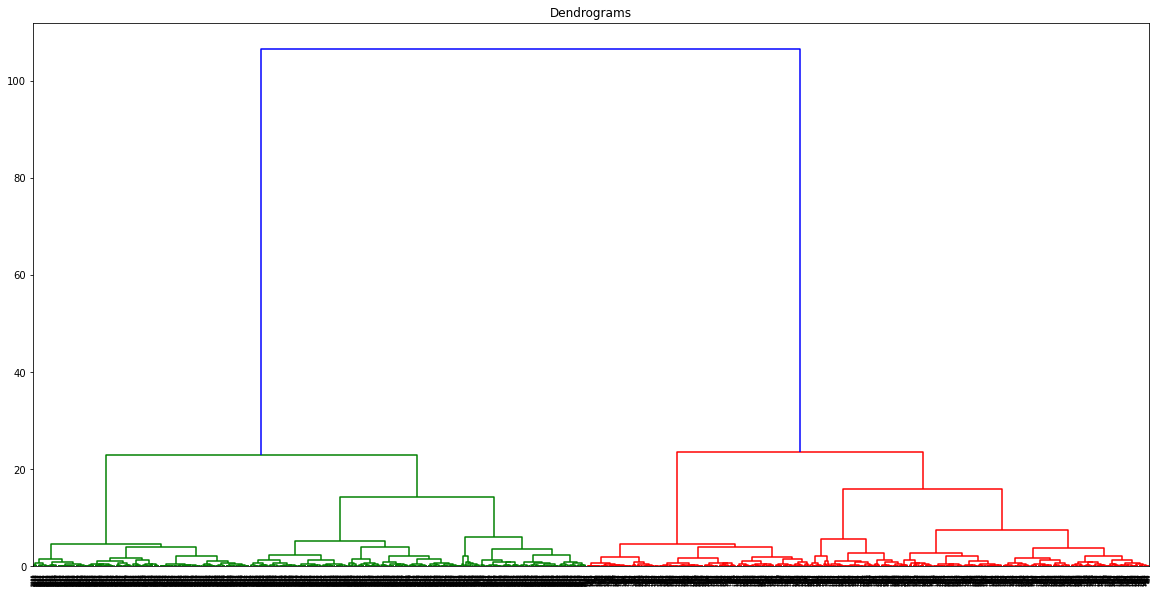

In [68]:
plt.figure(figsize=(20, 10))  

plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_test1_array, method='ward'))

#### Silhouette coefficient

In [69]:
 silhouette_score(X_test1_array, AgglomerativeClustering(n_clusters = 2).fit_predict(X_test1_array))

0.7599403175921552

### Spam email data - HAC
Because the algorithm takes longer to run, will down-sample the data to just few data points

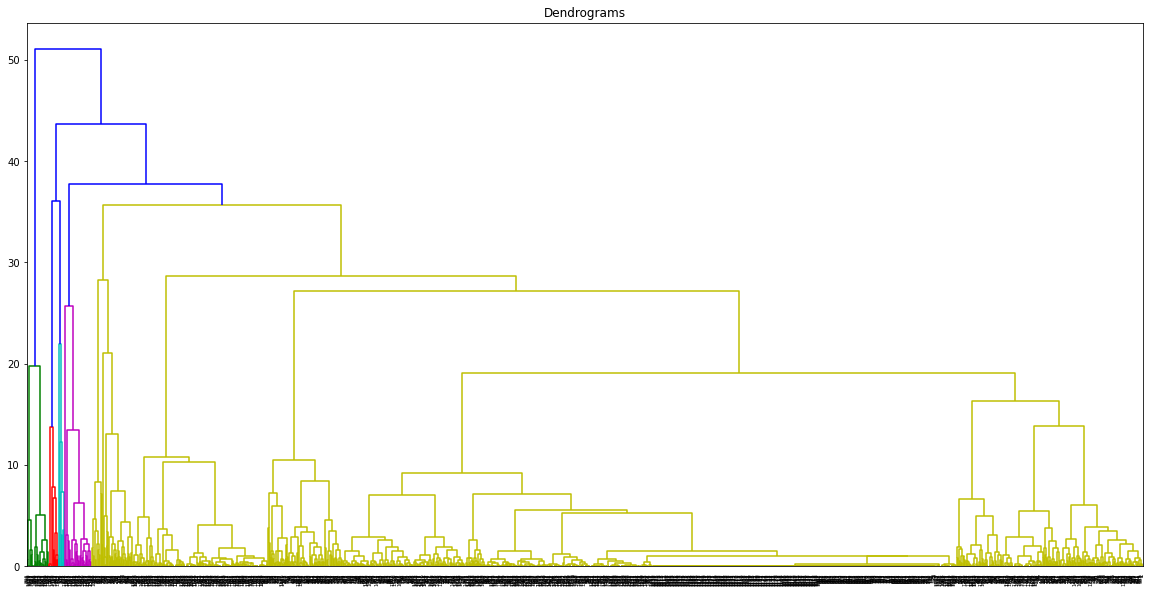

In [70]:
plt.figure(figsize=(20, 10))  

plt.title("Dendrograms")  

dend = shc.dendrogram(shc.linkage(X_test2_array, method='ward'))

### Silhouette coefficient

In [71]:
 silhouette_score(X_test2_array, AgglomerativeClustering(n_clusters = 2).fit_predict(X_test2_array))

0.7247236682476654

The dendrograms show that the synthetic data could be clustered into two main groups but could be sub-grouped into 4. Whereas the spam email data could be sub-grouped into 7 groups. This may be due to points that do not decisively belong to spam or non-spam emails due to the filtering criteria. Thus, to get clear two groups for the spam email data, the spam filtering criteria may need to be improved.